<a href="https://colab.research.google.com/github/aldyans/ecommerce-insights-analysis/blob/main/Proyek_Analisis_Dataset_E_commerce_ALDIANSYAH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Driving E-Commerce Growth with Data: Actionable Insights from Sales Trends, Customer Segmentation, and Pricing Analytics


## Tujuan Proyek

Proyek ini bertujuan untuk memberikan wawasan mendalam mengenai pola perilaku pelanggan, tren operasional, serta dinamika pasar pada platform e-commerce.Analisis berbasis data historis dari tahun 2016 hingga 2018. Dengan pendekatan analitis dan visualisasi data yang konkret, proyek ini akan menghasilkan rekomendasi strategis yang dapat meningkatkan efisiensi harga, retensi pelanggan, dan pertumbuhan penjualan secara berkelanjutan.

Dataset yang digunakan berasal dari kumpulan data publik yang mencakup informasi transaksi, pelanggan, produk, ulasan, dan metode pembayaran. Dataset ini memiliki struktur multi-tabel dengan ratusan ribu entri, memungkinkan analisis yang komprehensif dan holistik.

---

## Ruang Lingkup Analisis

### 1. Analisis Dinamika Penjualan Produk  
Mempelajari performa kategori produk dan pola permintaan berdasarkan waktu dan lokasi.

- **Identifikasi Kategori Terlaris**: Menganalisis kontribusi kategori terhadap jumlah transaksi dan pendapatan.
- **Analisis Tren Musiman**: Menemukan siklus bulanan/kuartalan sebagai dasar perencanaan kampanye pemasaran.
- **Insight Berbasis Wilayah**: Membandingkan pola belanja antar wilayah untuk mengevaluasi strategi distribusi dan lokalitas.

### 2. Segmentasi dan Perilaku Pelanggan  
Memahami siapa pelanggan paling loyal dan bagaimana mereka berinteraksi dengan platform.

- **Segmentasi RFM**: Mengelompokkan pelanggan berdasarkan recency, frequency, dan monetary value.
- **Analisis Sentimen Ulasan**: Mendeteksi kepuasan pelanggan melalui teks ulasan untuk memperbaiki pengalaman belanja.

### 3. Evaluasi Efisiensi Harga  
Mengidentifikasi anomali harga dan hubungan antara harga dan volume penjualan.

- **Perbandingan Harga Antar Kategori**: Menilai kesesuaian harga di antara jenis produk.
- **Korelasi Harga - Volume Penjualan**: Mengukur respons pasar terhadap variasi harga.
- **Deteksi Anomali Harga**: Mengidentifikasi ketidakwajaran harga yang mungkin tidak efiesien dan akan memberikan output negatif.

### 4. Preferensi Metode Pembayaran  
Mengetahui tren pembayaran dan dampaknya terhadap perilaku belanja.

- **Distribusi Pilihan Pembayaran**: Melihat preferensi utama pelanggan dalam bertransaksi.
- **Pengaruh Terhadap Nilai Transaksi**: Mengevaluasi apakah metode pembayaran tertentu berkorelasi dengan nilai transaksi yang lebih tinggi atau rendah.

---

## Hasil yang Diharapkan

- **Rekomendasi Strategis** berbasis data untuk optimalisasi harga, segmentasi pelanggan, dan perencanaan promosi musiman.
- **Peningkatan Retensi Pelanggan** melalui personalisasi berdasarkan segmentasi RFM.
- **Identifikasi Insight Operasional** yang membantu meningkatkan efisiensi proses bisnis.
- **Visualisasi Menarik** yang dapat digunakan dalam presentasi bisnis maupun portofolio teknis.

---

## Rencana Implementasi

1. Mengimpor dan membersihkan dataset.
2. Melakukan eksplorasi data (EDA) untuk memahami struktur dan pola yang ada.
3. Menganalisis penjualan berdasarkan produk, waktu, dan wilayah.
4. Segmentasi Pelanggan dengan Pendekatan RFM.
5. Evaluasi Harga dan Deteksi Anomali.
6. Menganalisis pola preferensi pembayaran dan pengaruhnya terhadap transaksi.
7. Membuat visualisasi temuan dan Penyusunan Rekomendasi Bisnis

---

*Catatan: Proyek ini dirancang untuk menjembatani antara analisis teknis dan keputusan bisnis strategis. Output akhir ditujukan untuk kalangan internal (seperti tim manajemen/pemasaran), sehingga disusun dengan pendekatan yang jelas, relevan, dan actionable.*

## Import Semua Packages/Library Yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Import Dan Bersihkan Dataset

In [2]:
# mengimport dataset via url Google Drive secara langsung
url_ids = {
    "customers_dataset" : "1_SQQ1T4pKevnZ2h4ukf2YzzdBBdrrk8v",
    "products_dataset" : "1kOGBpnizgko6VyuW11NzYse7-cEyArQz",
    "orders_dataset" : "1zIGJsnMbzdJDRpH6Y5aYJFOcUl2IDqgI",
    "order_items_dataset" : "149Ed-bsncSvy41Akk-Bw43DQyXEtvqvI",
    "order_payments_dataset" : "18Y8LcFEYaa1XVLdx_ZYaQc2nrN6G7rM_",
    "order_reviews_dataset" : "1OXFPSB787z10A95trHbxu3RnMMb0sitQ",
    "product_category_name_translation" : "133_7LKA8eli_TucNzYeKh1iZJtvsKh9q",
}

# membuat fungsi untuk mendapatkan dataset
def get_dataset(file_id):
  url = f"https://drive.google.com/uc?id={file_id}"
  data = pd.read_csv(url)
  return data

# inisiasi variabel dataset
customers_df = get_dataset(url_ids['customers_dataset'])
products_df = get_dataset(url_ids['products_dataset'])
orders_df = get_dataset(url_ids['orders_dataset'])
order_items_df = get_dataset(url_ids['order_items_dataset'])
order_payments_df = get_dataset(url_ids['order_payments_dataset'])
order_reviews_df = get_dataset(url_ids['order_reviews_dataset'])
product_category_name_translation = get_dataset(url_ids['product_category_name_translation'])

### Melakukan Pembersihan Terhadap Dataset

In [3]:
# customer_df
customers_df.info()
customers_df.isna().sum() # cek missing value
print(f'jumlah data duplikat: {customers_df.duplicated().sum()}') # cek duplikat
customers_df.describe(include='all') # cek sebaran nilai

# insight
"""
tidak ada yang salah pada tipe data.
tidak ada missing value.
tidak ada data duplikat.
tidak ada sebaran data yang aneh pada dataset.

dataset clean!
"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
jumlah data duplikat: 0


'\ntidak ada yang salah pada tipe data.\ntidak ada missing value.\ntidak ada data duplikat.\ntidak ada sebaran data yang aneh pada dataset.\n\ndataset clean!\n'

In [4]:
# products_df
#products_df.info()
products_df.isna().sum()
print(f'jumlah data duplikat: {products_df.duplicated().sum()}')
products_df.describe(include='all')

# insight
"""
ada beberapa missing value, tetapi format data tidak bermasalah.
ada sekitar 600 missing value pada beberapa kolom, akan diganti jadi kategori 'unknown', karena kita tidak bisa kehilangan data produk!
tidak ada data duplikat.
sebaran nilai aman.
nama kategori memakai bahasa portugis dan kita akan mengubahnya ke bahasa inggris dengan data dataset transtation.
"""

# data cleaning
products_df_cleaned = products_df[['product_id', 'product_category_name']].copy() # pilih hanya kolom yang relevan untuk analisis
products_df_cleaned.fillna('unknown', inplace=True) # isi missing value dengan 'unkonwn'
products_df_cleaned.isna().sum() # missing value hilang, dataset bersih!

# translasi data

# membuat beberapa data baru pada "product_category_name_translation" supaya pada saat penggabungan tidak terdapat missing value
new_row = pd.DataFrame({
    'product_category_name': ['unknown', 'portateis_cozinha_e_preparadores_de_alimentos', 'pc_gamer'],
    'product_category_name_english': ['unknown', 'portable_kitchen_and_food_preparators', 'gaming_pc']
})

# menggabungkan data translasi baru dengan dataset translasi
product_category_name_translation = pd.concat(
    [product_category_name_translation, new_row],
    ignore_index=True
)

# melakukan merge untuk memasukan data translasi products_df_cleaned
products_df_cleaned = products_df_cleaned.merge(
    product_category_name_translation,
    on='product_category_name',
    how='left'
)

products_df_cleaned.info() # dataset untuk analisis sudah bersih!

jumlah data duplikat: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_id                     32951 non-null  object
 1   product_category_name          32951 non-null  object
 2   product_category_name_english  32951 non-null  object
dtypes: object(3)
memory usage: 772.4+ KB


In [5]:
# orders_df
orders_df.info()
orders_df.isna().sum()
print(f'jumlah data duplikat: {orders_df.duplicated().sum()}')
orders_df.describe(include='all')

"""
beberapa tipe data salah, terutama yang harusnya datetime.
tidak ada data duplikat.
tidak ada yang aneh pada sebaran nilai, tapi sepertinya variasi untuk "order_estimated_delivery_date" -
terlalu sedikit untuk jumlah data yang cukup banyak.
"""

# pengubahan kolom yang memuat waktu kedalam tipe datetime
orders_datetime = ['order_purchase_timestamp', 'order_approved_at',
                   'order_delivered_carrier_date', 'order_delivered_customer_date',
                   'order_estimated_delivery_date'] # pilih kolom yang akan dijadikan datetime

for column in orders_datetime:
  orders_df[column] = pd.to_datetime(orders_df[column]) # lakukan looping untuk menerapkan konversi tipe data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
jumlah data duplikat: 0


In [6]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [7]:
orders_type = orders_df['order_status'].unique()
orders_type

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [8]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [9]:
# order_items_df
#order_items_df.info()
order_items_df.isna().sum()
print(f'jumlah data duplikat: {order_items_df.duplicated().sum()}')
order_items_df.describe(include='all')

"""
kolom shipping_limit_date harusnya bertipe data datetime
tidak ada missing value pada dataset
tidak ada data duplikat

ada beberapa hal yang perlu diperhatikan dari sebaran nilai kolom-kolom berikut:
order_item_id: nilai dari quantile 75 ke 100 sangat jauh berbeda, menunjukan frequensi pesanan produk yang banyak dan jarang terjadi.
price: sama dengan sebelumnya, nilai quantile 75 dengan nilai max sangat jauh, menunjukan produk tertentu yang sangat mahal.
freight_value: nilai ongkos kirim yang pada quantile 75 hanya $21, melonjak menjadi $409 pada nilai max nya,
menunjukan ongkos kirim mahal kepada produk tertentu / daerah yang jauh.
|
outliers ini tidak akan dihapus, karena dapat diekstrak menjadi insight terntentu.
"""

# cleaning data type:
order_items_df_cleaned = order_items_df.drop(columns=['seller_id']).copy() # hapus kolom yang tidak diperlukan
order_items_df_cleaned['shipping_limit_date'] = pd.to_datetime(order_items_df_cleaned['shipping_limit_date']) # ganti tipe data kolom yang salah jadi datetime
order_items_df_cleaned.info() # data sudah clean!


jumlah data duplikat: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   shipping_limit_date  112650 non-null  datetime64[ns]
 4   price                112650 non-null  float64       
 5   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 5.2+ MB


In [10]:
# order_payments_df
order_payments_df.info()
order_payments_df.isna().sum()
print(f'jumlah data duplikat: {order_payments_df.duplicated().sum()}')
order_payments_df.describe(include='all')

# insight
"""
tidak ada yang salah pada tipe data
tidak ada missing value
tidak ada data duplikat
payment_sequential, payment_installments, payment_value, semuanya memiliki nilai max yang jauh berbeda dibanding dengan quantile 75 nya,
hal ini normal mengingat produk tertentu yang dicicil dengan jumlah yang sangat banyak, ataupun harga yang sangat mahal.
|
outliers ini juga tidak akan kita hapus, karena ini kondisi yang relate dengan apa yang terjadi, dan bukan merupakan kesalahan.

dataset clean!
"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
jumlah data duplikat: 0


'\ntidak ada yang salah pada tipe data\ntidak ada missing value\ntidak ada data duplikat\npayment_sequential, payment_installments, payment_value, semuanya memiliki nilai max yang jauh berbeda dibanding dengan quantile 75 nya,\nhal ini normal mengingat produk tertentu yang dicicil dengan jumlah yang sangat banyak, ataupun harga yang sangat mahal.\n|\noutliers ini juga tidak akan kita hapus, karena ini kondisi yang relate dengan apa yang terjadi, dan bukan merupakan kesalahan.\n\ndataset clean!\n'

In [11]:
# order_reviews_df
order_reviews_df.info()
order_reviews_df.isna().sum()
print(f'jumlah data duplikat: {order_reviews_df.duplicated().sum()}')
order_reviews_df.describe(include='all')

# insight
"""
beberapa kolom yang berhubungan dengan waktu memiliki tipe data yang salah.
kolom yang berhubungan dengan pesan terhadap produk memiliki banyak missing value, ini karena ada banyak customer hanya memberikan nilai tanpa pesan.
tidak ada data duplikat.
sebaran nilai aman dan tidak ada yang aneh.
"""

# cleaning missing value
"""
kita akan mengganti missing value pada kolom "review_comment_title" dan "review_comment_message" menjadi "none".
"""
order_reviews_df_cleaned = order_reviews_df.fillna('none') # missing values sudah diatasi

review_columns_datetime = ['review_creation_date', 'review_answer_timestamp']
for column in review_columns_datetime:
  order_reviews_df_cleaned[column] = pd.to_datetime(order_reviews_df_cleaned[column]) # memperbaiki inacurate data type

order_reviews_df_cleaned.info() # dataset sudah clean!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
jumlah data duplikat: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  obje

## Exploratory Data Analysis (EDA)

### Eksplorasi

In [ ]:
customers_df.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [ ]:
products_df_cleaned.describe(include='all')

,product_id,product_category_name,product_category_name_english
count,32951,32951,32951
unique,32951,74,74
top,106392145fca363410d287a815be6de4,cama_mesa_banho,bed_bath_table
freq,1,3029,3029


In [ ]:
orders_df.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 18:35:24.098800128,2018-01-04 21:49:48.138278656,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-12 23:24:16,2017-09-15 22:28:50.249999872,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:36:13,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 20:35:10,2018-05-08 13:37:45,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


In [ ]:
orders_df.sample(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
16300,a43482a55cc8d11f47b25992831a794f,f4cbe58e364a58bb9e0ce73f92a8b37b,delivered,2017-10-12 10:56:25,2017-10-12 11:07:41,2017-10-17 20:37:05,2017-10-24 16:33:03,2017-11-03
2706,fd190164f3696146e8a668324f90edc0,6c4578ce47ec34cc93da19ac6e3f8534,delivered,2017-06-01 10:42:34,2017-06-01 10:55:14,2017-06-01 14:18:08,2017-06-19 15:04:15,2017-06-22
16526,16647da0639fd5db20f1e8de9305bc5c,0a28710d39c87618a19f30a66d3a70e4,delivered,2018-01-15 20:36:27,2018-01-15 20:50:43,2018-01-23 15:27:02,2018-02-05 22:33:41,2018-02-22
35197,f162504b437717036cc81bdd9a02c4ba,f45dc44959f8086d22e2d52553f15f57,delivered,2018-08-21 14:42:00,2018-08-21 14:55:10,2018-08-22 14:26:00,2018-08-30 13:37:38,2018-10-03
8725,087a1c1dfd41b68ab6a6cd8551147bb2,027173ae64ea4eb32139b3205e7e02c0,delivered,2018-07-30 14:06:15,2018-07-30 14:44:42,2018-07-31 13:12:00,2018-08-13 16:38:26,2018-08-07
27597,f2f276797fe0c5bb220e8fceefd0220b,c27703a50050afbb4661ad22ea030c7c,delivered,2017-05-25 10:07:59,2017-05-25 10:22:56,2017-05-25 13:12:05,2017-05-31 14:25:53,2017-06-19
14739,cb2932cadedc450a82a49823652f35f9,dea3439a6cd34a2a2642d0740ddae76a,delivered,2018-02-27 19:49:12,2018-03-01 02:50:49,2018-03-01 23:25:00,2018-03-15 12:37:50,2018-03-21
75385,3a832277787e9783a3efdd6f49781a77,32338bd45fc1691a84c9cd0b2c52112c,delivered,2018-05-04 14:00:25,2018-05-04 14:12:55,2018-05-10 10:41:00,2018-05-23 23:16:49,2018-05-30
15285,5a94fd90d3f89448e9e870e7cec75c52,772c0cc8054e2559cd15a12f7e4116bb,delivered,2017-08-07 20:34:03,2017-08-07 21:30:17,2017-08-08 18:09:44,2017-08-10 19:07:12,2017-09-01
18436,db938741a6e086fc10ca5c84d032fef3,52cba52537119edf3f855dab63b3e7bc,delivered,2018-04-25 14:16:47,2018-04-26 14:11:53,2018-04-27 16:14:00,2018-05-10 21:21:06,2018-05-23


In [ ]:
order_items_df_cleaned.sample(20)

,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value
11734,1aa2373a5597e5431f08d809fde15d5b,3,46b609a28b05ef9d5179026a055c5121,2017-08-15 02:50:58,59.90,8.80
63708,917738df2199692a3d9b6d85680a6595,1,5ac4f7986643a944501c66a2257bdd73,2017-11-14 12:15:35,49.90,12.69
12710,1cd0a2330def1be519e011cc6ef20db4,2,d3c044bd42d84a79e3b0c42662806a48,2017-09-28 10:50:20,25.90,25.63
36677,5340b130e66f95396ce83ee3f6d36ee4,1,b98992ea80b467987a7fbb88e7f2076a,2018-08-01 23:25:16,145.00,21.46
50114,71e22e2d99081d6dc07d9627bb85969e,1,ac480ada5f06d9024eae2c6dd9de4c74,2018-01-30 22:56:25,7.00,0.28
34666,4e7474d49d1ef3688ffdd819f87f8322,1,0fe922b7f7d43ef454bbc241416e7401,2018-08-20 19:15:29,16.00,7.39
97249,dc9f4cd231c11babfef316d35486eff4,1,98f129cbe241892b96fca3363f2caed4,2018-08-21 04:09:55,396.18,84.15
96492,dafc4b5ceac0b3e1eeb90f581dacebb6,1,f1d67bf6f48876883052184dbc05dcc7,2017-11-27 22:29:21,24.90,11.85
95677,d8ff993abef623e4c9956f245c4345e9,1,35afc973633aaeb6b877ff57b2793310,2018-08-08 08:35:14,77.90,14.86
72396,a51e2c85edcbee98d40ffd0bb3af875e,1,99c22bb8e56dda8aa0e021be31e8663d,2018-04-02 04:08:29,86.99,11.70


In [ ]:
order_items_df_cleaned[order_items_df_cleaned['order_id'] == 'c985ae8fdce216ddf62df687c3504ecb']

,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value
88726,c985ae8fdce216ddf62df687c3504ecb,1,bb09cce52b336261572a5a7e25a33795,2018-05-17 03:30:25,13.10,14.43
88727,c985ae8fdce216ddf62df687c3504ecb,2,4b15c9a92a5637d71143577edd7718b1,2018-05-17 03:30:25,18.90,14.42
88728,c985ae8fdce216ddf62df687c3504ecb,3,8213da1c8eae3aa3fa5c70d87fc1581c,2018-05-17 03:30:25,18.13,16.83


In [ ]:
order_payments_df.describe(include='all')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [ ]:
order_payments_df['payment_type'].unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

In [ ]:
order_payments_df.sample(10)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
40137,8acda261d8c76b3206d9cb5279d0a18a,1,credit_card,1,26.97
63713,5252be17eb4a003fa9d9d4121f05687f,1,credit_card,10,468.81
57523,d2eb9999568d1bba9d671c53926039cc,1,credit_card,8,155.28
24064,509098735f5ef060b30337a4261fe363,1,credit_card,1,80.20
70107,f637d76c398963bc6fd99947a23806f6,1,credit_card,10,296.33
23762,519e5b17180d3ebefad6f7b8c1a6c7c6,1,boleto,1,149.64
101612,f46b842d9b4dfd29acf5eec998837ede,1,credit_card,1,140.04
41669,1a46a59c4c13f2c52e453f8f490b7840,1,boleto,1,130.47
50834,1cff0fb86f1f68d69f65f7a9746f2096,1,boleto,1,267.25
100296,5797b09452273744ac62c38230d88248,1,credit_card,4,175.16


In [ ]:
order_items_df_cleaned[order_items_df_cleaned['order_id'] == '0a5a2c824e893eb66abd0d869f6c45e6']

,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value
4589,0a5a2c824e893eb66abd0d869f6c45e6,1,eb8c629f70275fd1c4f809116cce1efc,2017-09-03 22:30:13,38.4,15.1
4590,0a5a2c824e893eb66abd0d869f6c45e6,2,eb8c629f70275fd1c4f809116cce1efc,2017-09-03 22:30:13,38.4,15.1
4591,0a5a2c824e893eb66abd0d869f6c45e6,3,eb8c629f70275fd1c4f809116cce1efc,2017-09-03 22:30:13,38.4,15.1


In [ ]:
order_payments_df[order_payments_df['order_id'] == 'a69ba794cc7deb415c3e15a0a3877e69']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
52125,a69ba794cc7deb415c3e15a0a3877e69,1,credit_card,2,195.91


In [ ]:
order_payments_df[order_payments_df['payment_type'] == 'not_defined']


,order_id,payment_sequential,payment_type,payment_installments,payment_value
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.0
57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.0
94427,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.0


In [ ]:
satu = order_reviews_df_cleaned[order_reviews_df_cleaned['order_id'] == '3a3cddda5a7c27851bd96c3313412840'] #a69ba794cc7deb415c3e15a0a3877e69
print(satu['review_comment_message'])
satu

65292    none
Name: review_comment_message, dtype: object


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
65292,16d3db296c46b4411dfc5f8bde882e6d,3a3cddda5a7c27851bd96c3313412840,5,none,none,2018-07-24,2018-07-25 16:26:05


In [ ]:
orders_df[orders_df['order_status'] == 'created']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
7434,b5359909123fa03c50bdb0cfed07f098,438449d4af8980d107bf04571413a8e7,created,2017-12-05 01:07:52,NaT,NaT,NaT,2018-01-11
9238,dba5062fbda3af4fb6c33b1e040ca38f,964a6df3d9bdf60fe3e7b8bb69ed893a,created,2018-02-09 17:21:04,NaT,NaT,NaT,2018-03-07
21441,7a4df5d8cff4090e541401a20a22bb80,725e9c75605414b21fd8c8d5a1c2f1d6,created,2017-11-25 11:10:33,NaT,NaT,NaT,2017-12-12
55086,35de4050331c6c644cddc86f4f2d0d64,4ee64f4bfc542546f422da0aeb462853,created,2017-12-05 01:07:58,NaT,NaT,NaT,2018-01-08
58958,90ab3e7d52544ec7bc3363c82689965f,7d61b9f4f216052ba664f22e9c504ef1,created,2017-11-06 13:12:34,NaT,NaT,NaT,2017-12-01


In [ ]:
order_reviews_df_cleaned.describe(include='all')

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,99224,99224,99224,99224
unique,98410,98673,NaN,4528,36160,NaN,NaN
top,4548534449b1f572e357211b90724f1b,03c939fd7fd3b38f8485a0f95798f1f6,NaN,none,none,NaN,NaN
freq,3,3,NaN,87656,58247,NaN,NaN
mean,NaN,NaN,4.086421,NaN,NaN,2018-01-12 20:49:23.948238336,2018-01-16 00:23:56.977938688
min,NaN,NaN,1.000000,NaN,NaN,2016-10-02 00:00:00,2016-10-07 18:32:28
25%,NaN,NaN,4.000000,NaN,NaN,2017-09-23 00:00:00,2017-09-27 01:53:27.249999872
50%,NaN,NaN,5.000000,NaN,NaN,2018-02-02 00:00:00,2018-02-04 22:41:47.500000
75%,NaN,NaN,5.000000,NaN,NaN,2018-05-16 00:00:00,2018-05-20 12:11:21.500000
max,NaN,NaN,5.000000,NaN,NaN,2018-08-31 00:00:00,2018-10-29 12:27:35


### **Insights dari Exploratory Data Analysis**

#### 1. Profil Pelanggan dan Geografi  
Dataset mencakup **96.096 pelanggan unik** (`customer_unique_id`) yang tersebar di **4.119 kota** pada **27 negara bagian**. Hal ini menunjukkan bahwa platform e-commerce memiliki cakupan pasar yang luas dan tersebar secara geografis. Distribusi yang luas ini membuka peluang untuk analisis segmentasi berbasis lokasi dan perilaku regional pelanggan.

---

#### 2. Keanekaragaman Produk  
Terdapat **32.951 produk unik** yang dikategorikan ke dalam **74 kategori utama**. Meskipun nama produk secara spesifik tidak tersedia, kategori utama dapat dimanfaatkan untuk analisis performa produk dan perilaku pembelian berdasarkan jenis produk.

---

#### 3. Pola Pemesanan dan Pembelian  
- Dataset mencatat **99.441 histori pesanan** (`order_id`) yang dilakukan oleh pelanggan antara tahun 2016 hingga 2018. Uniknya, setiap `order_id` hanya diasosiasikan dengan satu pelanggan, yang mengindikasikan bahwa sebagian besar pelanggan hanya melakukan satu kali transaksi selama periode observasi.
- Sebanyak **112.650 item** dipesan, menunjukkan bahwa satu pelanggan dapat membeli lebih dari satu item dalam satu order.
- Berdasarkan analisis distribusi kuantil, mayoritas pelanggan membeli satu item per transaksi, namun ada juga pelanggan yang membeli hingga 21 item dalam sekali order.
- Biaya pengiriman (`freight_value`) dikenakan per barang, bukan per order. Ini berarti meskipun beberapa barang dibeli dalam satu order, biaya kirim tetap dihitung secara individual — meskipun barang tersebut adalah barang yang sama.

---

#### 4. Metode dan Pola Pembayaran  
- Dataset mencatat **103.886 histori pembayaran**, dengan **99.440 `order_id` unik** yang konsisten dengan data pesanan. Terdapat 5 metode pembayaran utama:
  - `credit_card`
  - `boleto` (transfer bank lokal)
  - `voucher`
  - `debit_card`
  - `not_defined` (menunjukan transaksi yang ditarik kembali. Setelah ditelusuri, kebanyakan karena barangnya tidak sesuai dan pelanggan meminta return. hal ini sangat jarang terjadi, dan hanya ditemukan 5 data untuk kasus seperti ini.)
- Variabel `payment_sequential` menunjukkan jumlah total cicilan, sedangkan `payment_installments` menjelaskan partisi tiap pembayaran.
- Nilai `payment_value` selalu sesuai dengan `price + freight_value`, sehingga dapat digunakan untuk menghitung total pendapatan secara akurat.

---

#### 5. Review Pelanggan  
- Dataset mencatat **99.224 review**, dengan **98.410 `review_id` unik**, yang menunjukkan bahwa satu `review_id` bisa mencakup beberapa review, terutama jika pelanggan memesan beberapa produk berbeda dalam satu order transaksi.
- Mayoritas pelanggan **tidak mengisi bagian teks pada review:**
  - **87.656 tidak mengisi judul review**
  - **58.247 tidak mengisi pesan review**
- Meski begitu, pelanggan yang telah memberikan review dapat memberikan insight penting tentang pengalaman pelanggan dan kualitas layanan.

---

#### 6. Masalah pada Status Pesanan dan Dampaknya
Analisis gabungan antara data orders, order_payments, dan order_reviews mengungkapkan bahwa:

- Banyak pesanan berstatus selain `delivered` yang sudah dibayar, namun berujung pada review negatif.
- Beberapa keluhan umum yang ditemukan:
  - Produk tidak diterima meskipun status `shipped`.
  - Barang hilang saat pengiriman dan status tidak diperbarui.
  - Produk dibatalkan (`canceled`) tetapi tetap dikirim, bahkan diganti produk lain.
  - Status pesanan tetap `processing` atau `created` padahal barang sudah diterima.
  - Beberapa order bahkan tidak mengkonfirmasi timestamp persetujuan untuk menandakan bahwa order telah resmi dilakukan (`order_approved_at`). Dan bahkan setelah ditelusuri, order telah sampai kepada pelanggan.

> Hal ini menunjukkan **adanya ketimpangan antara status sistem dan realitas transaksi**, yang dapat menurunkan kepercayaan pelanggan.

#### # Penyebab yang Teridentifikasi:
- **Kelalaian seller** dalam memperbarui status secara manual.
- **Praktik tidak etis oleh seller**, seperti mengirim produk yang dibatalkan atau tidak tersedia.
- **Kegagalan sistem integrasi** antara e-commerce dan jasa logistik yang membuat update status tidak berjalan seperti semestinya.

---

#### 7. Kesimpulan
Exploratory Data Analysis (EDA) ini memberikan gambaran menyeluruh tentang kondisi operasional dan perilaku pelanggan di platform e-commerce. Dari analisis ini juga, didapatkan simpulan:  
- Data yang tersedia **cukup representatif** untuk menjawab pertanyaan-pertanyaan penting dan memenuhi berbagai objektif dari analisis yang akan dilakukan.
- Ada **beberapa isu operasional** yang mulai terlihat dari data review dan status pesanan.
- Platform memiliki **potensi besar** untuk ditingkatkan performanya melalui analisis lanjutan berbasis pelanggan, produk, tren, dan metode pembayaran.

---

## Analisis Penjualan Produk

### **Kategori Produk Terlaris**

#### Features Engineering & Cleaning

In [12]:
# kita akan membuat sebuah data baru yang menyediakan informasi mengenai item yang diorder + nama kategori produknya.

ordered_products_df = order_items_df_cleaned.merge(products_df_cleaned,
                                                 on='product_id',
                                                 how='left').drop(columns=['product_category_name'])

ordered_products_df.head(10)

,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,2017-09-19 09:45:35,58.90,13.29,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,2017-05-03 11:05:13,239.90,19.93,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,2018-01-18 14:48:30,199.00,17.87,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,2018-08-15 10:10:18,12.99,12.79,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,2017-02-13 13:57:51,199.90,18.14,garden_tools
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,2017-05-23 03:55:27,21.90,12.69,housewares
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,2017-12-14 12:10:31,19.90,11.85,telephony
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,2018-07-10 12:30:45,810.00,70.75,garden_tools
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,2018-03-26 18:31:29,145.95,11.65,health_beauty
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,2018-07-06 14:10:56,53.99,11.40,books_technical


In [13]:
"""
selanjutnya kita akan melakukan pemilihan kolom pada orders_df,-
supaya analisis yang kita lakukan bisa menjadi lebih mudah dan sesuai dengan objektif.
kita akan melakukan drop pada kolom keterangan waktu yang lain, dan menyisakan `order_purchase_timestamp`-
sebagai informasi untuk acuan analisis berbasis tren.

`order_status` akan disertakan semuanya, karena apapun statusnya, data yang ada tetap mencerminkan tren dan perilaku pembelian pelanggan.
"""

orders_df_selected = orders_df[['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp']].copy()
orders_df_selected.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02


In [14]:
# gabungkan data orders yang telah dipilih dengan data item yang di order + namanya
orders_comprehensive_df = orders_df_selected.merge(ordered_products_df,
                                                   on='order_id',
                                                   how='left')
orders_comprehensive_df.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_item_id,product_id,shipping_limit_date,price,freight_value,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,1.0,87285b34884572647811a353c7ac498a,2017-10-06 11:07:15,29.99,8.72,housewares
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,1.0,595fac2a385ac33a80bd5114aec74eb8,2018-07-30 03:24:27,118.70,22.76,perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,1.0,aa4383b373c6aca5d8797843e5594415,2018-08-13 08:55:23,159.90,19.22,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,2017-11-23 19:45:59,45.00,27.20,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2018-02-19 20:31:37,19.90,8.72,stationery
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,1.0,060cb19345d90064d1015407193c233d,2017-07-13 22:10:13,147.90,27.36,auto
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,1.0,a1804276d9941ac0733cfd409f5206eb,2017-04-19 13:25:17,49.90,16.05,unknown
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,1.0,4520766ec412348b8d4caa5e8a18c464,2017-05-22 13:22:11,59.99,15.17,auto
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,1.0,ac1789e492dcd698c5c10b97a671243a,2017-01-27 18:29:09,19.90,16.05,furniture_decor
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,1.0,9a78fb9862b10749a117f7fc3c31f051,2017-08-11 12:05:32,149.99,19.77,office_furniture


In [15]:
""""
sayangnya setelah digabungkan, ada beberapa missing value.
dan ini memiliki pola yang sama untuk kolom order_item_id dan kebawahnya.
ini menunjukan bahwa ada order_id yang memang item yang pesanannya sama sekali tidak didaftarkan di order_items.

dan setelah diselidiki lebih lanjut, ternyata kebanyakan status pesanan yang memiliki value kosong adalah `canceled` atau `unavailable`.
ini menunjukan pola yang jelas, bahwa pesanan yang dibatalkan tidak akan terdaftar produknya.
tetapi masalahnya disini ketika ditelusuri lebih lanjut, ada banyak pelanggan yang telah terlanjur membayar tetapi seller
tidak mengembalikan uang mereka setelah produk dinyatakan tidak ada. dan pelanggan tidak bisa mendapatkan kembali uang mereka.
ini bisa menjadi analisis yang lebih dalam pada bagian selanjutnya. untuk sekarang kita akan membuang data yang mempunyai nilai kosong.
"""
orders_comprehensive_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_item_id,775
product_id,775
shipping_limit_date,775
price,775
freight_value,775
product_category_name_english,775


In [16]:
orders_comprehensive_df_cleaned = orders_comprehensive_df.dropna().copy()
orders_comprehensive_df_cleaned.isna().sum() # missing value sudah beres!

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_item_id,0
product_id,0
shipping_limit_date,0
price,0
freight_value,0
product_category_name_english,0


#### Analisis & Visualisasi

In [17]:
# menemukan kategori dengan penjualan dan pendapatan tertinggi
top_categories = orders_comprehensive_df_cleaned.groupby(by='product_category_name_english').agg({
  'order_item_id': [('item_count', 'count')],
  'price': [('revenue', 'sum')],
  'freight_value': [('avg_freight_value', 'mean')]
}).reset_index()

top_categories.columns = ['product_category_name_english'] + [col[1] for col in top_categories.columns[1:]] # flatten kolom bertingkat dan jadikan satu baris kolom
top_categories.head(10) # tampilkan 10 data pertama

,product_category_name_english,item_count,revenue,avg_freight_value
0,agro_industry_and_commerce,212,72530.47,27.564151
1,air_conditioning,297,55024.96,22.724680
2,art,209,24202.64,19.354880
3,arts_and_craftmanship,24,1814.01,15.422083
4,audio,364,50688.50,15.688022
5,auto,4235,592720.11,21.880569
6,baby,3065,411764.89,22.301178
7,bed_bath_table,11115,1036988.68,18.415928
8,books_general_interest,553,46856.88,16.628427
9,books_imported,60,4639.85,12.830833


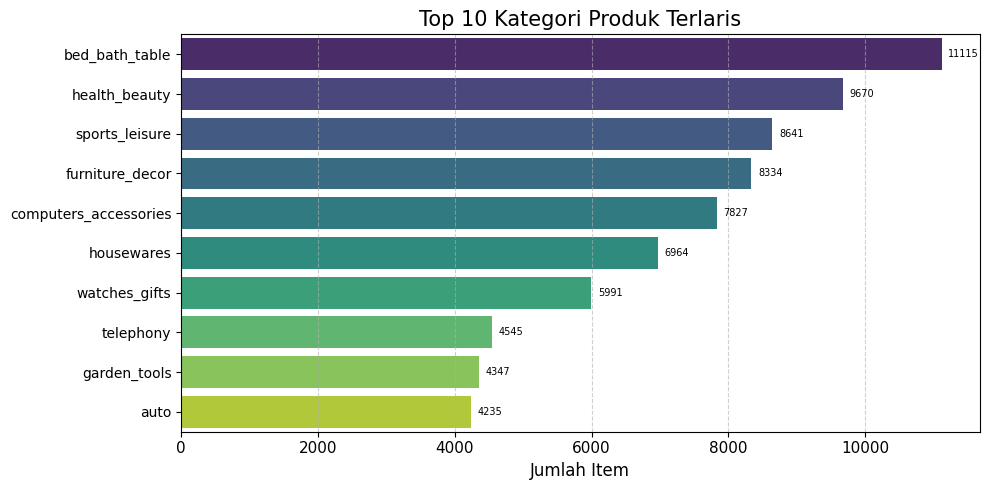

In [18]:
# Membuat bar chart untuk melihat kategori dengan volume penjualan terbanyak
plt.figure(figsize=(10, 5))
sns.barplot(
    data=top_categories.sort_values(by='item_count', ascending=False).head(10),
    x='item_count',
    y='product_category_name_english',
    palette='viridis', hue='product_category_name_english', legend=False  # Menggunakan palet warna Viridis
)

# Menambahkan nilai numerik di atas setiap bar
for index, value in enumerate(top_categories.sort_values(by='item_count', ascending=False).head(10)['item_count']):
    plt.text(value + 100, index, f'{value}', va='center', fontsize=7)

# Kustomisasi tampilan
plt.title('Top 10 Kategori Produk Terlaris', fontsize=15)
plt.xlabel('Jumlah Item', fontsize=12)
plt.ylabel(None)
plt.yticks(fontsize=10)
plt.xticks(fontsize=11)
plt.grid(axis='x', linestyle='--', alpha=0.6)  # Tambahkan grid horizontal
plt.tight_layout()  # Memastikan semua elemen cocok dalam figure

plt.show()

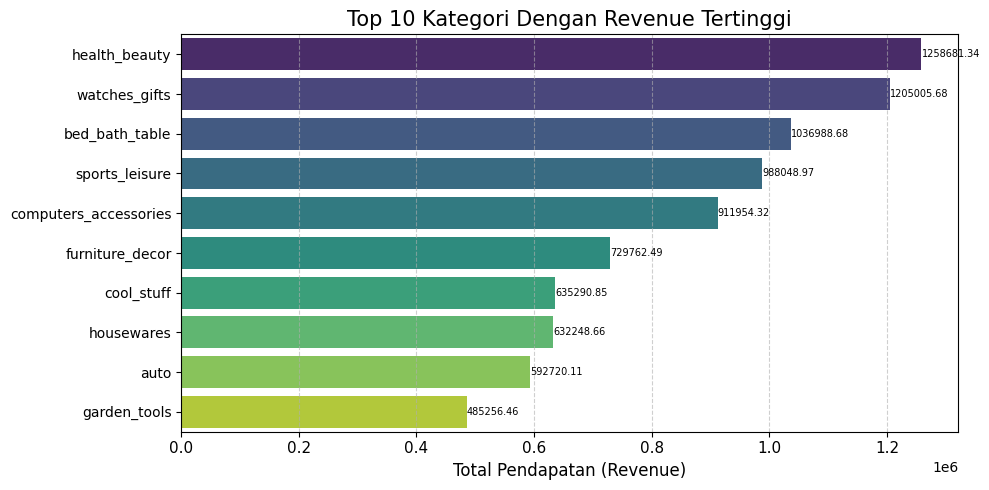

In [19]:
# Membuat bar chart untuk melihat kategori dengan revenue terbanyak
plt.figure(figsize=(10, 5))
sns.barplot(
    data=top_categories.sort_values(by='revenue', ascending=False).head(10),
    x='revenue',
    y='product_category_name_english',
    palette='viridis', hue='product_category_name_english', legend=False # Menggunakan palet warna Viridis
)

# Menambahkan nilai numerik di atas setiap bar
for index, value in enumerate(top_categories.sort_values(by='revenue', ascending=False).head(10)['revenue']):
    plt.text(value + 100, index, f'{value}', va='center', fontsize=7)

# Kustomisasi tampilan
plt.title('Top 10 Kategori Dengan Revenue Tertinggi', fontsize=15)
plt.xlabel('Total Pendapatan (Revenue)', fontsize=12)
plt.ylabel(None)
plt.yticks(fontsize=10)
plt.xticks(fontsize=11)
plt.grid(axis='x', linestyle='--', alpha=0.6)  # Tambahkan grid horizontal
plt.tight_layout()  # Memastikan semua elemen cocok dalam figure

plt.show()

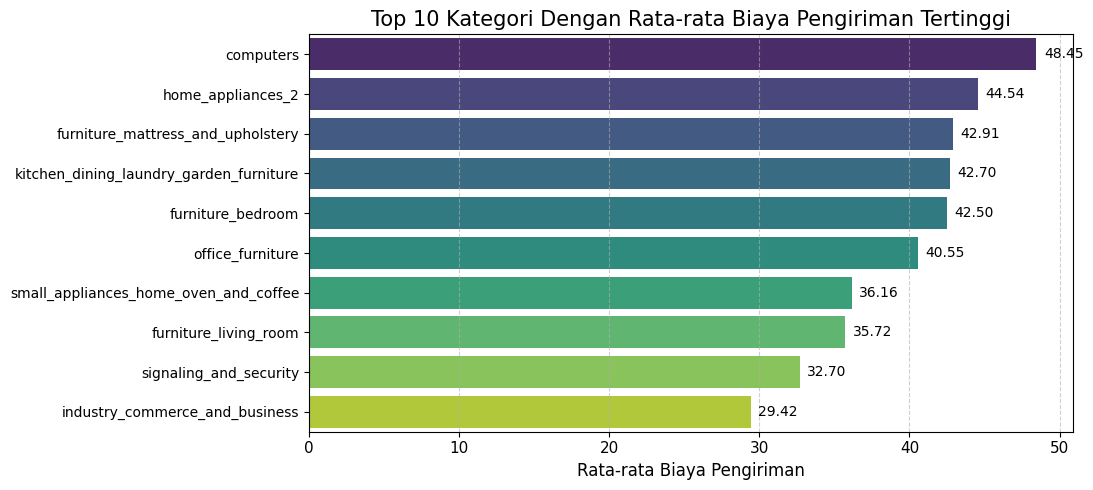

In [20]:
# Membuat bar chart
plt.figure(figsize=(11, 5))
sns.barplot(
    data=top_categories.sort_values(by='avg_freight_value', ascending=False).head(10),
    x='avg_freight_value',
    y='product_category_name_english',
    palette='viridis', hue='product_category_name_english', legend=False # Menggunakan palet warna Viridis
)

# Menambahkan nilai numerik di atas setiap bar dengan format xx.xx
for index, value in enumerate(top_categories.sort_values(by='avg_freight_value', ascending=False).head(10)['avg_freight_value']):
    plt.text(value + 0.5, index, f'{value:.2f}', va='center', fontsize=10, color='black')

# Kustomisasi tampilan
plt.title('Top 10 Kategori Dengan Rata-rata Biaya Pengiriman Tertinggi', fontsize=15)
plt.xlabel('Rata-rata Biaya Pengiriman', fontsize=12)
plt.ylabel(None)
plt.yticks(fontsize=10)
plt.xticks(fontsize=11)
plt.grid(axis='x', linestyle='--', alpha=0.6)  # Tambahkan grid horizontal
plt.tight_layout()  # Memastikan semua elemen cocok dalam figure

plt.show()

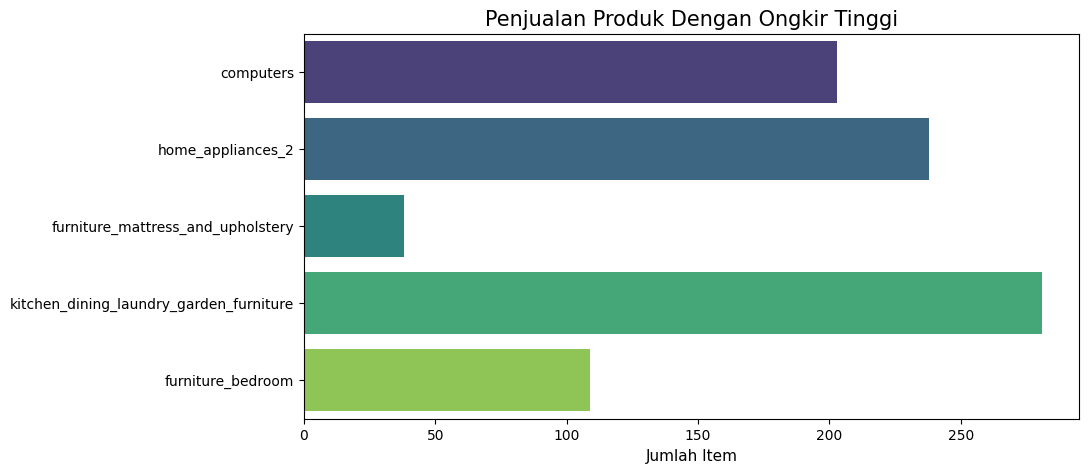

In [21]:
freihgt_cat = ['computers','home_appliances_2',
              'furniture_mattress_and_upholstery',
              'kitchen_dining_laundry_garden_furniture',
              'furniture_bedroom',]

def get_categories(col):
    for category in freihgt_cat:
      if category == 'computers':
        high_freight = col[col['product_category_name_english'] == category]
      else:
        high_freight = pd.concat([high_freight, col[col['product_category_name_english'] == category]])

    return high_freight

high_freight = get_categories(top_categories)
plt.figure(figsize=(10, 5))
sns.barplot(data=high_freight, x='item_count', y='product_category_name_english',
            palette='viridis', hue='product_category_name_english', legend=False)
plt.title('Penjualan Produk Dengan Ongkir Tinggi', fontsize=15)
plt.ylabel(None)
plt.xlabel('Jumlah Item', fontsize=11)
plt.show()

In [22]:
high_freight['item_count'].mean()

np.float64(173.8)

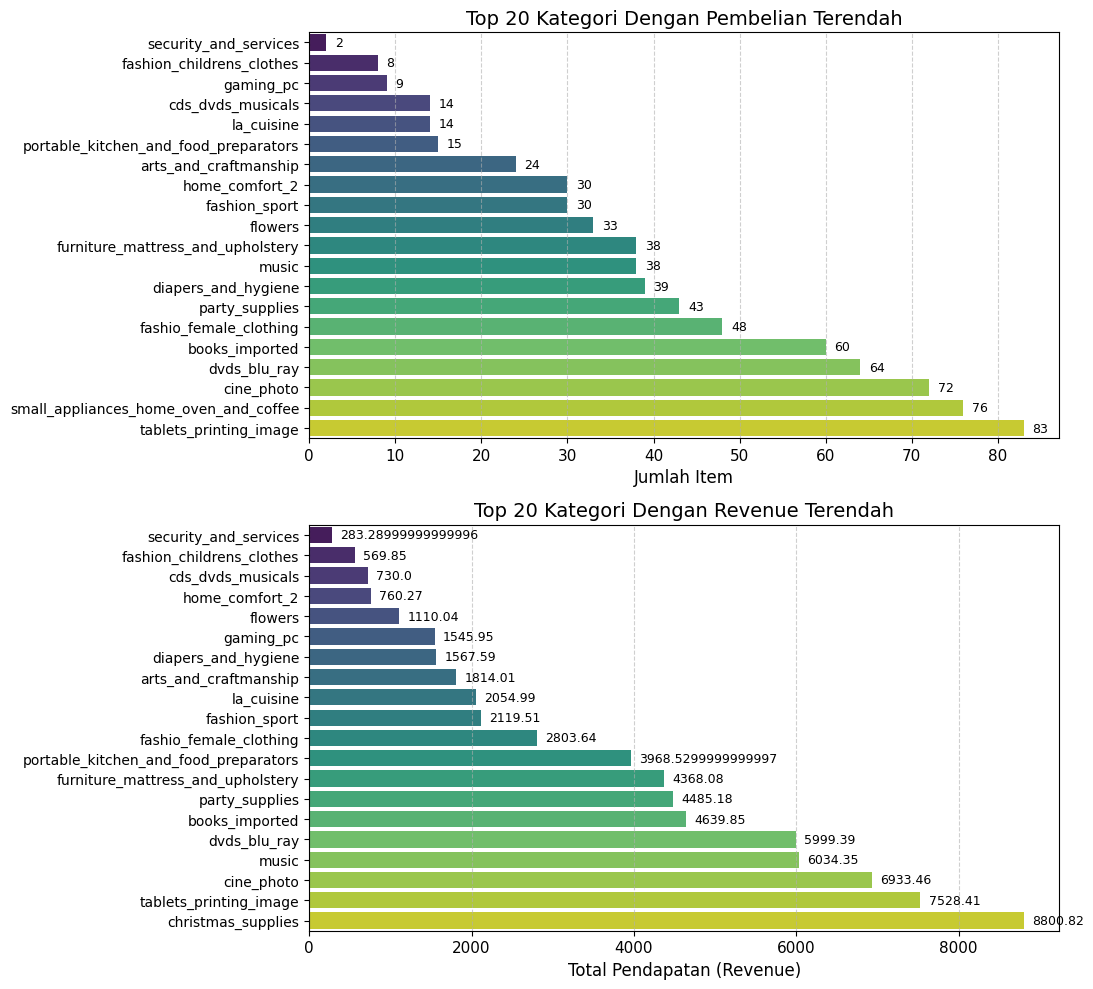

In [23]:
# Plot 1: Kategori dengan item_count terendah
lowest_item_count = top_categories.sort_values(by='item_count', ascending=True).head(20)

# Plot 2: Kategori dengan revenue terendah
lowest_revenue = top_categories.sort_values(by='revenue', ascending=True).head(20)

# Membuat figure dengan dua subplot (vertikal)
fig, axes = plt.subplots(2, 1, figsize=(11, 10))  # 2 baris, 1 kolom

# Plot 1: Kategori dengan item_count paling rendah
sns.barplot(
    data=lowest_item_count,
    x='item_count',
    y='product_category_name_english',
    palette='viridis', hue='product_category_name_english', legend=False,
    ax=axes[0]
)
axes[0].set_title('Top 20 Kategori Dengan Pembelian Terendah', fontsize=14)
axes[0].set_xlabel('Jumlah Item', fontsize=12)
axes[0].set_ylabel(None)
axes[0].grid(axis='x', linestyle='--', alpha=0.6)  # Tambahkan grid horizontal
axes[0].tick_params(axis='y', labelsize=10)
axes[0].tick_params(axis='x', labelsize=11)

# Menambahkan nilai numerik di sebelah kanan setiap bar
for index, value in enumerate(lowest_item_count['item_count']):
    axes[0].text(value + 1, index, f'{value}', va='center', fontsize=9, color='black')

# Plot 2: Kategori dengan revenue paling rendah
sns.barplot(
    data=lowest_revenue,
    x='revenue',
    y='product_category_name_english',
    palette='viridis', hue='product_category_name_english', legend=False,
    ax=axes[1]
)
axes[1].set_title('Top 20 Kategori Dengan Revenue Terendah', fontsize=14)
axes[1].set_xlabel('Total Pendapatan (Revenue)', fontsize=12)
axes[1].set_ylabel(None)
axes[1].grid(axis='x', linestyle='--', alpha=0.6)  # Tambahkan grid horizontal
axes[1].tick_params(axis='y', labelsize=10)
axes[1].tick_params(axis='x', labelsize=11)

# Menambahkan nilai numerik di sebelah kanan setiap bar
for index, value in enumerate(lowest_revenue['revenue']):
    axes[1].text(value + 100, index, f'{value}', va='center', fontsize=9, color='black')

# Menyesuaikan layout agar tidak tumpang tindih
plt.tight_layout()
plt.show()

##### <u>Insight</u>:

### **Analisis Kategori Produk Terlaris**  


#### Tujuan Analisis

Analisis ini bertujuan untuk mengidentifikasi kategori produk dengan performa tertinggi dan terendah berdasarkan:
- Jumlah item terjual (volume penjualan)
- Revenue yang dihasilkan
- Biaya pengiriman rata-rata per kategori

Dengan pendekatan data-driven, diharapkan hasil analisis ini memberikan wawasan strategis untuk meningkatkan efisiensi harga, retensi pelanggan, serta pertumbuhan penjualan secara berkelanjutan.

---

### 1. Kategori Produk dengan Performa Penjualan Tertinggi

#### A. Top 3 Kategori Berdasarkan Volume Penjualan

| Kategori | Jumlah Terjual | Insight |
|---------|----------------|---------|
| `bed_bath_table` | 11.115 unit | Permintaan tinggi karena sifatnya yang esensial dan sering digunakan sehari-hari. |
| `health_beauty` | 9.670 unit | Pasar stabil didorong oleh tren gaya hidup sehat dan kebutuhan personal care. |
| `sports_leisure` | 8.641 unit | Minat konsumen pada aktivitas fisik dan hobi menjadi pendorong utama. |

> **Insight**: Ketiga kategori ini layak mendapat fokus ekspansi lebih lanjut melalui cross-selling dan bundling.

---

#### B. Top 3 Kategori Berdasarkan Revenue

| Kategori | Revenue | Insight |
|---------|--------|---------|
| `health_beauty` | `$`1.258.681 | Margin tinggi meski bukan penjualan terbanyak — cocok untuk strategi premium pricing. |
| `watches_gifts` | `$`1.205.005,68 | Harga jual tinggi karena sifatnya yang mewah atau berorientasi momen spesial. |
| `bed_bath_table` | `$`1.036.988,68 | Gabungan volume tinggi dan harga kompetitif menjadikannya kontributor besar revenue. |

> **Insight**: `health_beauty` dan `watches_gifts` adalah kategori high-margin yang ideal untuk kampanye eksklusif dan upselling.

---

### 2. Kategori Produk dengan Performa Terendah

#### A. Kategori dengan Penjualan Rendah
- **Jumlah Kategori Dianalisis**: 20 dari total 74 kategori.
- **Rentang Penjualan**: 2–80 unit, rata-rata sekitar 35 unit.
- **Beberapa Kategori Yang Termasuk**:
  - `fashion sport`
  - `books imported`
  - `dvds blu ray`

> **Insight**: Kategori ini kurang relevan bagi mayoritas pelanggan dan memerlukan strategi penetrasi pasar yang lebih tepat sasaran.

---

#### B. Kategori dengan Revenue Rendah
- **Rentang Revenue**: `$`200–`$`8.800, rata-rata `$`3.500.
- **Identifikasi Penyebab Utama**:
  - Volume penjualan yang rendah
  - Kurangnya visibilitas atau brand awareness

> **Insight**: Perlu dilakukan evaluasi ulang apakah kategori ini masih layak dipertahankan atau perlu diset sebagai niche market.

---

### 3. Kategori dengan Ongkir Tertinggi dan Dampaknya pada Penjualan

| Kategori | Ongkir Rata-Rata | Insight |
|---------|------------------|---------|
| `computers` | `$`48,5 | Produk elektronik cenderung lebih berat dan butuh pengemasan khusus. |
| `home_appliances_2` | `$`44,54 | Logistik rumah tangga besar meningkatkan biaya pengiriman. |
| `furniture_mattress_and_upholstery` | `$`42,91 | Dimensi besar dan berat memicu biaya logistik tinggi. |

> **Masalah Utama**:  
Produk dalam kategori ini memiliki penjualan rata-rata hanya **~175 unit**, jauh di bawah rata-rata kategori populer (~ ribuan unit).

> **Hal Yang Perlu Diperhatikan**:  
Harga total (produk + ongkir) membuat produk kurang kompetitif di pasar.

---

### 4. Insight Utama

1. **bed_bath_table** dan **health_beauty** adalah dua kategori andalan yang harus dikembangkan lebih lanjut.
2. **watches_gifts** memiliki potensi margin tinggi dan layak untuk fokus pada segmentasi premium.
3. **Kategori dengan ongkir tinggi** (`computers`, `furniture`, dll.) membutuhkan strategi logistik khusus agar tetap kompetitif.

---

### 5. Rekomendasi Strategis

| Area | Insight | Rekomendasi Prioritas |
|------|--------|------------------------|
| **Ekspansi Kategori Andalan** | `bed_bath_table`, `health_beauty`, dan `watches_gifts` dominan | Lakukan **cross-selling** dan **bundling** untuk meningkatkan nilai transaksi. |
| **Strategi Premium Pricing** | `health_beauty` dan `watches_gifts` memiliki margin tinggi | Gunakan **dynamic pricing** dan **personalized promotions** untuk segmen loyal pelanggan. |
| **Optimasi Kategori dengan Ongkir Tinggi** | `computers`, `furniture`, dll. memiliki ongkir tinggi dan penjualan rendah | Subsidi ongkir untuk pembelian > `$`500 dan bangun **local fulfillment centers** -<br> untuk pengiriman lebih cepat dan murah. |
| **Revitalisasi Kategori Underperform** | Ada 20 kategori dengan penjualan < 100 unit | Jalankan **flash sale**, **influencer campaign**, dan **bundling dengan produk populer**. |
| **Niche Market Expansion** | Beberapa kategori kurang relevan secara massal | Lakukan riset pasar untuk memahami potensi niche dan tambahkan variasi produk sesuai permintaan. |
| **Inventory Management** | Kategori populer memiliki permintaan tinggi | Pastikan stok selalu tersedia dan siapkan **inventory forecasting tools** untuk antisipasi lonjakan permintaan. |

---

### 6. Kesimpulan Akhir

Analisis ini berhasil mengidentifikasi bahwa:

- **bed_bath_table**, **health_beauty**, dan **watches_gifts** merupakan kategori dengan kontribusi terbesar terhadap penjualan dan revenue.
- Sebaliknya, beberapa kategori mengalami kesulitan karena:
  - Harga total tidak kompetitif
  - Biaya pengiriman tinggi
  - Kurangnya minat pasar umum

Dengan implementasi rekomendasi strategis ini, bisnis diharapkan dapat:
- Meningkatkan revenue melalui optimasi pricing dan promosi
- Memperluas pasar melalui ekspansi niche
- Meningkatkan profitabilitas dengan mengurangi beban logistik dan meningkatkan efisiensi distribusi

---

### **Tren Musiman**

In [27]:
# Ekstraksi tahun, bulan, dan triwulan
orders_comprehensive_df_cleaned['year'] = orders_comprehensive_df_cleaned['order_purchase_timestamp'].dt.year
orders_comprehensive_df_cleaned['month'] = orders_comprehensive_df_cleaned['order_purchase_timestamp'].dt.month
orders_comprehensive_df_cleaned['quarter'] = orders_comprehensive_df_cleaned['order_purchase_timestamp'].dt.quarter

# Tampilkan hasil
print(orders_comprehensive_df_cleaned[['order_purchase_timestamp', 'year', 'month', 'quarter']].head())

  order_purchase_timestamp  year  month  quarter
0      2017-10-02 10:56:33  2017     10        4
1      2018-07-24 20:41:37  2018      7        3
2      2018-08-08 08:38:49  2018      8        3
3      2017-11-18 19:28:06  2017     11        4
4      2018-02-13 21:18:39  2018      2        1


In [28]:
# Agregasi data berdasarkan bulan
sales_trend = orders_comprehensive_df_cleaned.groupby(['year', 'month', 'quarter']).agg({
    'order_item_id': 'count',  # Menghitung seberapa banyak produk yang terjual
    'price': 'sum',         # Total revenue
}).reset_index()

# Rename kolom
sales_trend.rename(columns={
    'order_item_id': 'item_count',
    'price': 'total_revenue',
}, inplace=True)

# drop bulan pertama dan bulan terakhir karena data hanya mencapai setengah bulan saja
#monthly_sales = monthly_sales.drop([0, 23])
sales_trend.head(5) # tampilkan lima data pertama

,year,month,quarter,item_count,total_revenue
0,2016,9,3,6,267.36
1,2016,10,4,363,49507.66
2,2016,12,4,1,10.90
3,2017,1,1,955,120312.87
4,2017,2,1,1951,247303.02


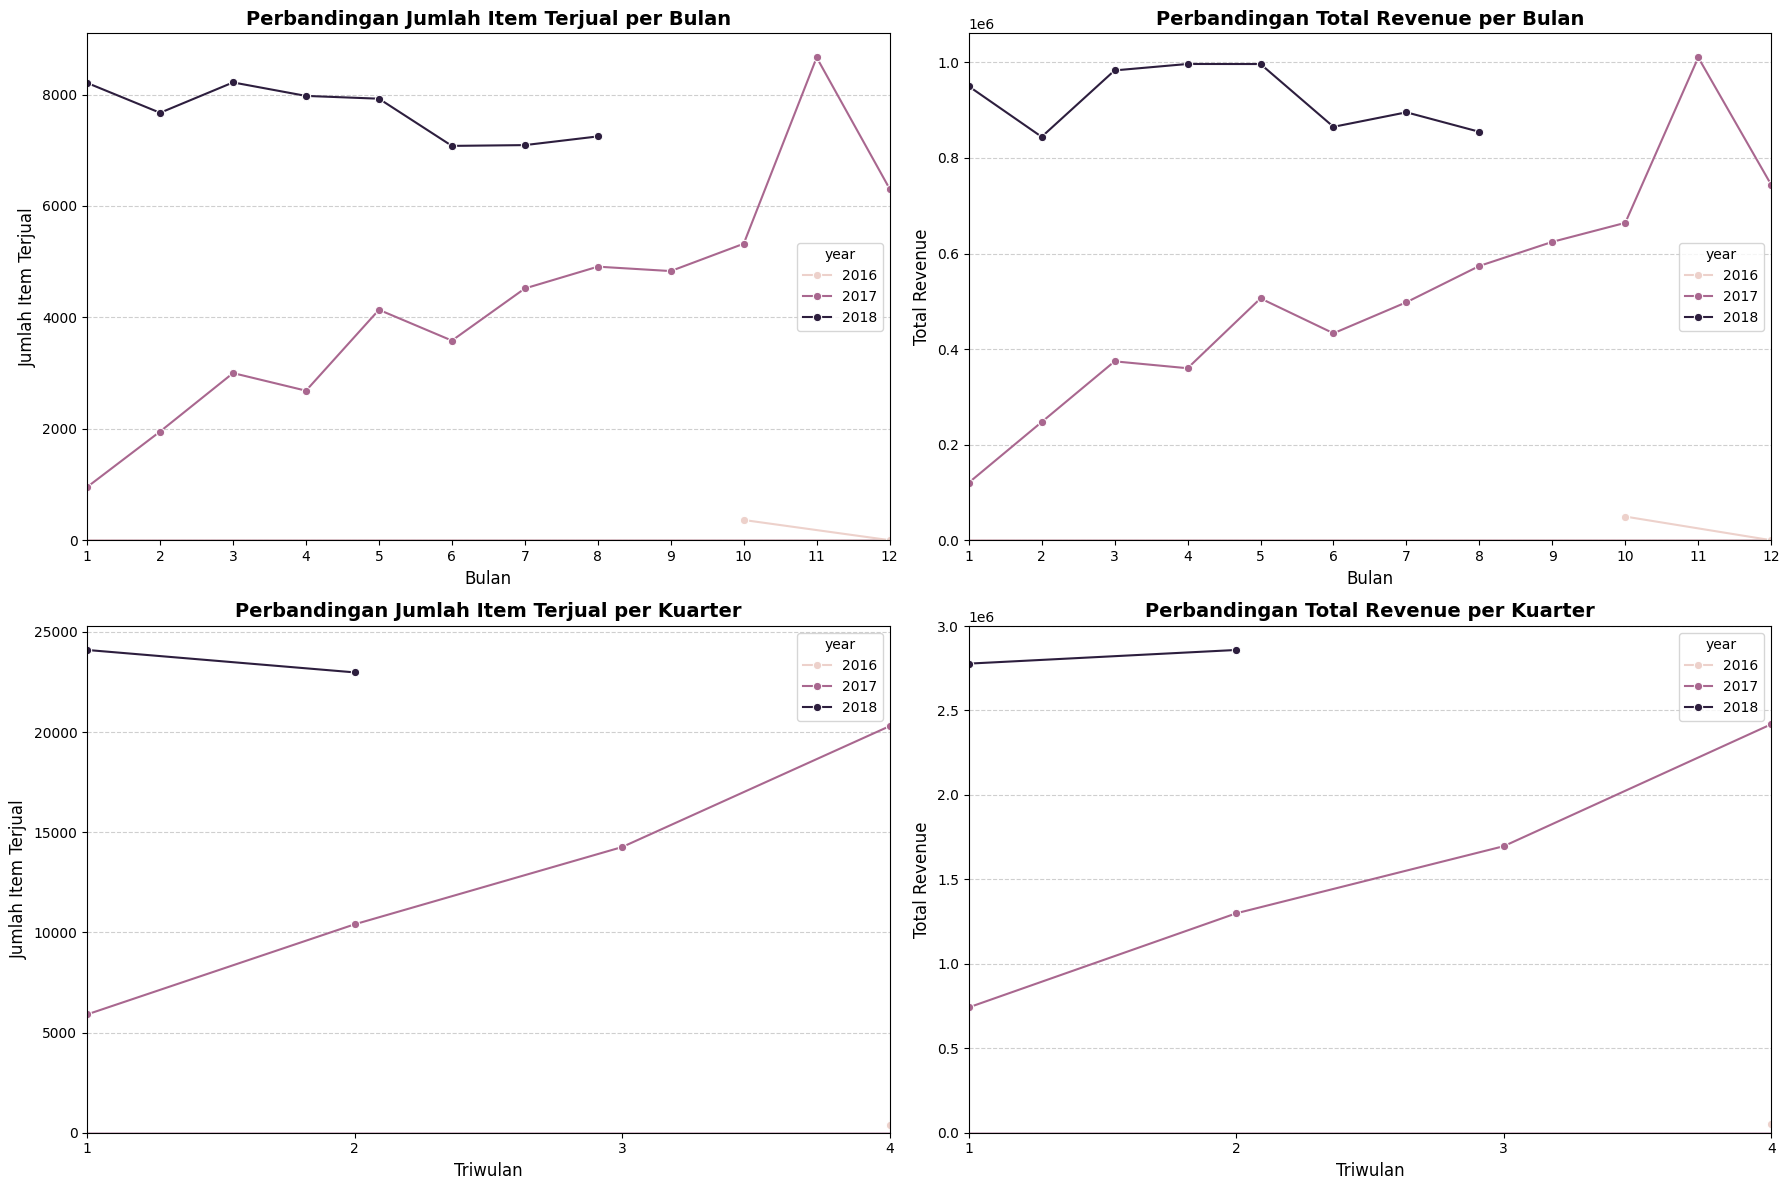

In [31]:
# Membuat figure dengan 4 subplot (grid 2x2)
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Plot 1: Perbandingan Jumlah Item Terjual per Bulan
sns.lineplot(data=sales_trend.drop([0, 23]), x='month', y='item_count', hue='year', marker='o', ax=axes[0, 0])
sns.kdeplot(data=sales_trend.drop([0, 23]), x='item_count', hue='year', fill=True, alpha=0.3, ax=axes[0, 0], legend=False)

axes[0, 0].set_title('Perbandingan Jumlah Item Terjual per Bulan', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Bulan', fontsize=12)
axes[0, 0].set_ylabel('Jumlah Item Terjual', fontsize=12)
axes[0, 0].grid(axis='y', linestyle='--', alpha=0.6)
axes[0, 0].set_xticks(range(1, 13))  # Menetapkan sumbu x hanya untuk bulan 1-12
axes[0, 0].set_xlim(1, 12)  # Batasi rentang sumbu x antara 1 hingga 12

# Plot 2: Perbandingan Total Revenue per Bulan
sns.lineplot(data=sales_trend.drop([0, 23]), x='month', y='total_revenue', hue='year', marker='o', ax=axes[0, 1])
sns.kdeplot(data=sales_trend.drop([0, 23]), x='total_revenue', hue='year', fill=True, alpha=0.3, ax=axes[0, 1], legend=False)

axes[0, 1].set_title('Perbandingan Total Revenue per Bulan', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Bulan', fontsize=12)
axes[0, 1].set_ylabel('Total Revenue', fontsize=12)
axes[0, 1].grid(axis='y', linestyle='--', alpha=0.6)
axes[0, 1].set_xticks(range(1, 13))  # Menetapkan sumbu x hanya untuk bulan 1-12
axes[0, 1].set_xlim(1, 12)  # Batasi rentang sumbu x antara 1 hingga 12

# buat data baru untuk analisis triwulan
quarter_trend = sales_trend.groupby(by=['year', 'quarter']).agg({
    'item_count' : 'sum',
    'total_revenue' : 'sum'
}).reset_index()

# Plot 3: Perbandingan Jumlah Item Terjual per Triwulan
sns.lineplot(data=quarter_trend.drop([0,8]), x='quarter', y='item_count', hue='year', marker='o', ax=axes[1, 0])
sns.kdeplot(data=quarter_trend.drop([0,8]), x='item_count', hue='year', fill=True, alpha=0.3, ax=axes[1, 0], legend=False, warn_singular=False)

axes[1, 0].set_title('Perbandingan Jumlah Item Terjual per Kuarter', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Triwulan', fontsize=12)
axes[1, 0].set_ylabel('Jumlah Item Terjual', fontsize=12)
axes[1, 0].grid(axis='y', linestyle='--', alpha=0.6)
axes[1, 0].set_xticks(range(1, 5))  # Menetapkan sumbu x hanya untuk triwulan 1-4
axes[1, 0].set_xlim(1, 4)  # Batasi rentang sumbu x antara 1 hingga 4

# Plot 4: Perbandingan Total Revenue per Triwulan
sns.lineplot(data=quarter_trend.drop([0,8]), x='quarter', y='total_revenue', hue='year', marker='o', ax=axes[1, 1])
sns.kdeplot(data=quarter_trend.drop([0,8]), x='total_revenue', hue='year', fill=True, alpha=0.3, ax=axes[1, 1], legend=False, warn_singular=False)

axes[1, 1].set_title('Perbandingan Total Revenue per Kuarter', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Triwulan', fontsize=12)
axes[1, 1].set_ylabel('Total Revenue', fontsize=12)
axes[1, 1].grid(axis='y', linestyle='--', alpha=0.6)
axes[1, 1].set_xticks(range(1, 5))  # Menetapkan sumbu x hanya untuk triwulan 1-4
axes[1, 1].set_xlim(1, 4)  # Batasi rentang sumbu x antara 1 hingga 4

# Menyesuaikan layout agar tidak tumpang tindih
plt.tight_layout()

# Menampilkan plot
plt.show()

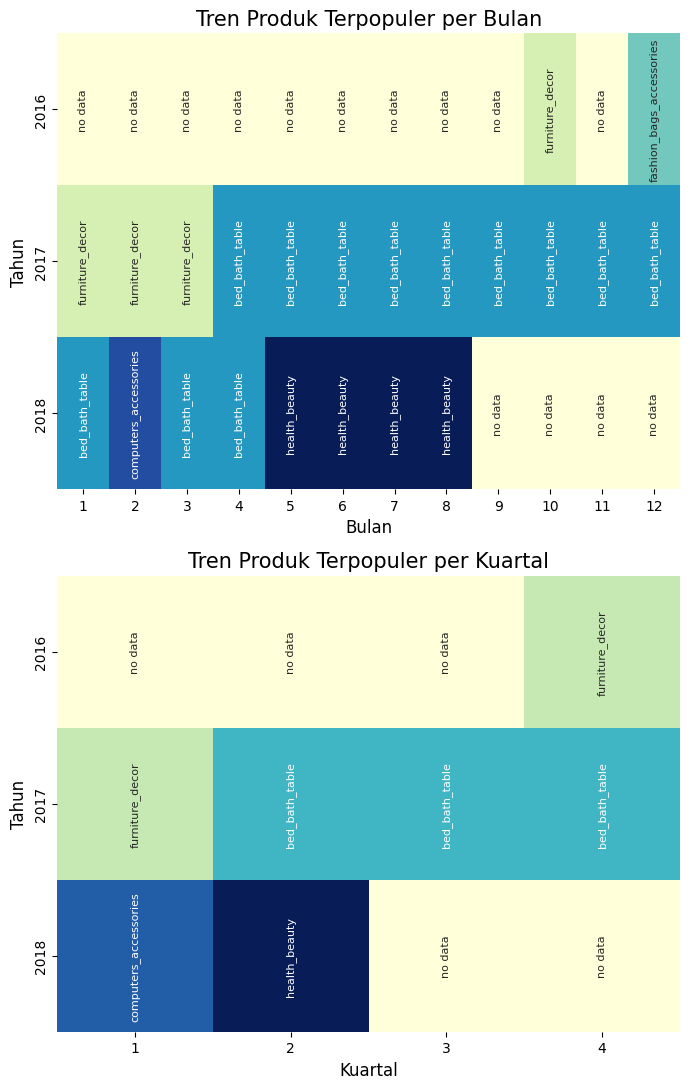

In [30]:
#melihat produk yang paling diminati dari waktu ke waktu

# Fungsi untuk menghitung modus
def calculate_mode(x):
    return x.value_counts().idxmax()

# Agregasi data bulanan
monthly_trend = orders_comprehensive_df_cleaned.groupby(by=['year', 'month']).agg({
    'product_category_name_english': lambda x: calculate_mode(x)
}).reset_index()

# Agregasi data kuartalan
quarterly_trend = orders_comprehensive_df_cleaned.groupby(by=['year', 'quarter']).agg({
    'product_category_name_english': lambda x: calculate_mode(x)
}).reset_index()

# Drop baris pertama dan terakhir karena data pada baris tersebut tidak komplit
monthly_trend = monthly_trend.drop([0, len(monthly_trend) - 1])
quarterly_trend = quarterly_trend.drop([0, len(quarterly_trend) - 1])

# Pivot tabel untuk heatmap bulanan
monthly_pivot = monthly_trend.pivot_table(
    index='year',
    columns='month',
    values='product_category_name_english',
    aggfunc=lambda x: x.mode()[0],
    fill_value="no data"
)

# Pivot tabel untuk heatmap kuartalan
quarterly_pivot = quarterly_trend.pivot_table(
    index='year',
    columns='quarter',
    values='product_category_name_english',
    aggfunc=lambda x: x.mode()[0],
    fill_value="no data"
)

# Mengganti .applymap() dengan .apply()
monthly_encoded = monthly_pivot.apply(
    lambda col: col.map(lambda x: list(monthly_trend['product_category_name_english'].unique()).index(x) if x != "no data" else -1)
)

quarterly_encoded = quarterly_pivot.apply(
    lambda col: col.map(lambda x: list(quarterly_trend['product_category_name_english'].unique()).index(x) if x != "no data" else -1)
)

# Membuat figure dengan dua subplot vertikal (satu di atas, satu di bawah)
fig, axes = plt.subplots(2, 1, figsize=(7, 11))  # 2 baris, 1 kolom

# Heatmap untuk tren bulanan
sns.heatmap(
    monthly_encoded,
    annot=monthly_pivot.values,
    fmt='',
    cmap='YlGnBu',
    cbar=False,
    annot_kws={'rotation': 90, "fontsize":8},  # Rotasi teks anotasi menjadi vertikal
    ax=axes[0]
)
axes[0].set_title('Tren Produk Terpopuler per Bulan', fontsize=15)
axes[0].set_xlabel('Bulan', fontsize=12)
axes[0].set_ylabel('Tahun', fontsize=12)

# Heatmap untuk tren kuartalan
sns.heatmap(
    quarterly_encoded,
    annot=quarterly_pivot.values,
    fmt='',
    cmap='YlGnBu',
    cbar=False,
    annot_kws={'rotation': 90, "fontsize":8},  # Rotasi teks anotasi menjadi vertikal
    ax=axes[1]
)
axes[1].set_title('Tren Produk Terpopuler per Kuartal', fontsize=15)
axes[1].set_xlabel('Kuartal', fontsize=12)
axes[1].set_ylabel('Tahun', fontsize=12)

# Menyesuaikan layout agar tidak tumpang tindih
plt.tight_layout()
plt.show()

##### <u>Insights:</u>

### **Analisis Tren Musiman: Penjualan & Revenue**

#### Tujuan Analisis  
Analisis ini bertujuan untuk mengidentifikasi pola musiman dalam **penjualan produk** dan **pendapatan (revenue)** di platform e-commerce selama periode **2016–2018**. Dengan pendekatan analitis dan visualisasi data yang konkret, hasil analisis ini memberikan wawasan strategis untuk meningkatkan efisiensi promosi, retensi pelanggan, dan pertumbuhan penjualan secara berkelanjutan.

---

###  1. Gambaran Umum Tren Musiman

####  Insight Utama:
- Terdapat **pola musiman yang jelas**, terutama pada akhir tahun.
- Bulan **November** secara konsisten menjadi **bulan puncak penjualan**, diduga kuat dipicu oleh kampanye **Black Friday**.
- Bisnis menunjukkan **pertumbuhan signifikan dari tahun ke tahun**, meskipun ada fluktuasi di beberapa periode.

> 💡 *Momen Black Friday menjadi momentum utama untuk kampanye besar dan optimalisasi stok serta logistik.*

---

### 2. Analisis Berdasarkan Tahun

#### Tahun 2016: Fase Awal dengan Kinerja Rendah
- Volume item terjual per bulan masih rendah.
- Revenue juga rendah, sejalan dengan performa penjualan.
- Quartal 4 menunjukkan kinerja lemah, mungkin disebabkan oleh data tidak lengkap atau pasar yang belum matang.

---

#### Tahun 2017: Titik Balik Pertumbuhan Signifikan
- Peningkatan konsisten sepanjang tahun.
- **Puncak tertinggi terjadi di bulan November**, dengan lebih dari **8.000 unit terjual**.
- **Revenue melebihi $1 juta** di bulan tersebut.
- AOV (Average Order Value) juga naik, menunjukkan bahwa pelanggan mulai membeli produk dengan nilai lebih tinggi.

---

#### Tahun 2018: Stabilitas dengan Fluktuasi Akhir Tahun
- Awal tahun 2018 menunjukkan peningkatan solid dibandingkan tahun sebelumnya.
- Namun, **Quartal 2** mencatat **penurunan penjualan**, mungkin disebabkan oleh:
  - Persaingan yang semakin ketat
  - Kurangnya kampanye promosi aktif
- Secara bulanan, jumlah item terjual tetap stabil (**7.000–8.000/unit**) meski ada penurunan.
- Meskipun volume turun, **revenue tetap meningkat**, menunjukkan bahwa **AOV meningkat**.

---

### 3. Analisis Tren Produk Terpopuler

#### Tren Bulanan
| Tahun | Bulan | Kategori Terlaris |
|-------|-------|-------------------|
| 2016 | Okt   | `furniture_decor` |
| 2016 | Des   | `fashion_bags_accessories` |
| 2017 | Jan–Mar | `furniture_decor` |
| 2017 | Apr–Des | `bed_bath_table` |
| 2018 | Jan   | `bed_bath_table` |
| 2018 | Feb   | `computers_accessories` |
| 2018 | Mar–Apr | `bed_bath_table` |
| 2018 | Mei–Agu | `health_beauty` |

> **Insight**:
- `bed_bath_table` menjadi kategori andalan yang stabil dan populer di sebagian besar waktu.
- `health_beauty` menunjukkan pertumbuhan pesat di paruh kedua 2018.
- `computers_accessories` memiliki potensi sebagai kategori musiman (misalnya saat liburan sekolah atau promo teknologi).

---

#### Tren Kuartalan
| Tahun | Quartal | Kategori Terlaris |
|-------|---------|-------------------|
| 2016 | Q4      | `furniture_decor` |
| 2017 | Q1      | `furniture_decor` |
| 2017 | Q2–Q4   | `bed_bath_table` |
| 2018 | Q1      | `computers_accessories` |
| 2018 | Q2      | `health_beauty` |

> **Insight**:
- Pola transisi dari `furniture_decor` → `bed_bath_table` → `computers_accessories` → `health_beauty` menunjukkan dinamika permintaan konsumen yang cepat.
- Fleksibilitas dalam menyesuaikan stok dan promosi berdasarkan tren kuartalan dapat dilakukan untuk mengoptimalkan momentum.

---

### 4. Insight Strategis Utama

1. **Musim Belanja (November)** adalah **titik puncak penjualan dan revenue**, menjadikannya momentum utama untuk kampanye besar.
2. **Bed Bath Table** adalah kategori **paling stabil dan populer**, cocok untuk strategi bundling dan cross-selling.
3. **Health Beauty** menunjukkan **pertumbuhan signifikan di 2018**, membuka peluang untuk ekspansi pasar wanita dan produk self-care.
4. **Computers Accessories** memiliki **potensi musiman**, cocok untuk promosi teknologi di akhir tahun atau saat liburan.
5. **AOV meningkat meskipun volume turun**, menunjukkan efektivitas strategi harga premium dan segmentasi pelanggan.

---

### 5. Rekomendasi Strategis

| Area | Insight | Rekomendasi Prioritas |
|------|--------|------------------------|
| **Promosi Musiman** | Lonjakan penjualan di November | Lakukan kampanye besar seperti **“Black Friday Sale”** selama satu minggu dengan diskon spesial dan free shipping. |
| **Segmentasi Produk** | `bed_bath_table` stabil, `health_beauty` tumbuh cepat | Dorong **cross-selling** di kategori rumah tangga dan investasi lebih dalam di produk kesehatan/kecantikan. |
| **Strategi Harga Dinamis** | AOV meningkat meskipun volume turun | Gunakan **strategi pricing tiered** untuk produk premium dan bundling untuk meningkatkan nilai order. |
| **Tren Teknologi** | `computers_accessories` populer di awal 2018 | Luncurkan kampanye **“Tech Week”** di semester dua untuk menarik minat pelanggan segmen teknologi. |
| **Data Incomplete** | Data 2016 tidak lengkap | Evaluasi ulang sistem pencatatan transaksi agar semua bulan tersedia untuk analisis mendalam di masa depan. |
| **Geografi dan Lokalisasi** | SP dominan, wilayah lain memiliki potensi | Fokus penetrasi di wilayah **Nordeste** dan **GO** dengan promosi lokal dan personalisasi produk. |

---

### 6. Kesimpulan

Analisis tren musiman ini berusaha untuk mengungkap pola penting dalam perilaku belanja pelanggan dan dinamika pasar pada e-commerce. Beberapa insight krusial meliputi:

- **November adalah bulan emas** untuk kampanye besar.
- **Bed Bath Table** adalah kategori andalan yang layak dikembangkan.
- **Health Beauty** menunjukkan pertumbuhan luar biasa dan harus menjadi fokus utama.
- **AOV meningkat**, menunjukkan potensi monetisasi yang lebih tinggi dari pelanggan yang sama.

Dengan implementasi rekomendasi strategis ini, bisnis diharapkan dapat meningkatkan revenue, memperluas pasar, dan membangun loyalitas pelanggan secara berkelanjutan.

---

### **Wawasan Geografis**

In [38]:
# satukan data penjualan produk dengan data customer yang melakukan order produk tersebut

customer_geolocation = orders_comprehensive_df_cleaned.merge(
    customers_df.drop(columns=['customer_zip_code_prefix']),
    on='customer_id',
    how='left'
)

customer_geolocation.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_item_id,product_id,shipping_limit_date,price,freight_value,product_category_name_english,year,month,quarter,customer_unique_id,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,1.0,87285b34884572647811a353c7ac498a,2017-10-06 11:07:15,29.99,8.72,housewares,2017,10,4,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,1.0,595fac2a385ac33a80bd5114aec74eb8,2018-07-30 03:24:27,118.70,22.76,perfumery,2018,7,3,af07308b275d755c9edb36a90c618231,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,1.0,aa4383b373c6aca5d8797843e5594415,2018-08-13 08:55:23,159.90,19.22,auto,2018,8,3,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,2017-11-23 19:45:59,45.00,27.20,pet_shop,2017,11,4,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2018-02-19 20:31:37,19.90,8.72,stationery,2018,2,1,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,1.0,060cb19345d90064d1015407193c233d,2017-07-13 22:10:13,147.90,27.36,auto,2017,7,3,80bb27c7c16e8f973207a5086ab329e2,congonhinhas,PR
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,1.0,a1804276d9941ac0733cfd409f5206eb,2017-04-19 13:25:17,49.90,16.05,unknown,2017,4,2,36edbb3fb164b1f16485364b6fb04c73,santa rosa,RS
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,1.0,4520766ec412348b8d4caa5e8a18c464,2017-05-22 13:22:11,59.99,15.17,auto,2017,5,2,932afa1e708222e5821dac9cd5db4cae,nilopolis,RJ
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,1.0,ac1789e492dcd698c5c10b97a671243a,2017-01-27 18:29:09,19.90,16.05,furniture_decor,2017,1,1,39382392765b6dc74812866ee5ee92a7,faxinalzinho,RS
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,1.0,9a78fb9862b10749a117f7fc3c31f051,2017-08-11 12:05:32,149.99,19.77,office_furniture,2017,7,3,299905e3934e9e181bfb2e164dd4b4f8,sorocaba,SP


In [39]:
#buat data yang memuat data-data yang berdasarkan lokasi dari customer

customer_state = customer_geolocation.groupby(by='customer_state').agg({
    'customer_unique_id' : 'nunique',
    'order_item_id' : 'count',
    'price' : 'sum'
}).reset_index()

customer_state.rename(columns={
  'customer_unique_id' : 'customer_count',
  'order_item_id' : 'item_count',
  'price' : 'total_revenue'
}, inplace=True)

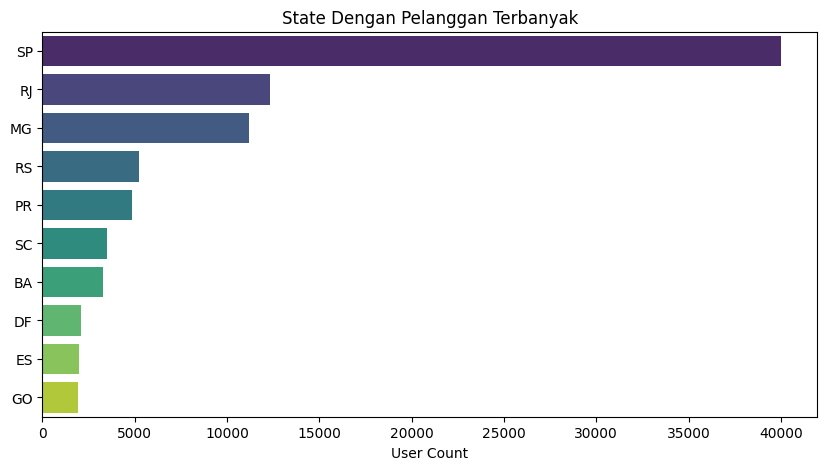

In [40]:
# melihat state dengan customer paling banyak

plt.figure(figsize=(10, 5))
sns.barplot(
    data=customer_state.sort_values(by='customer_count', ascending=False).head(10),
    x='customer_count',
    y='customer_state',
    hue='customer_state',
    palette='viridis',
    legend=False
)
plt.title('State Dengan Pelanggan Terbanyak')
plt.xlabel('User Count')
plt.ylabel(None)
plt.show()


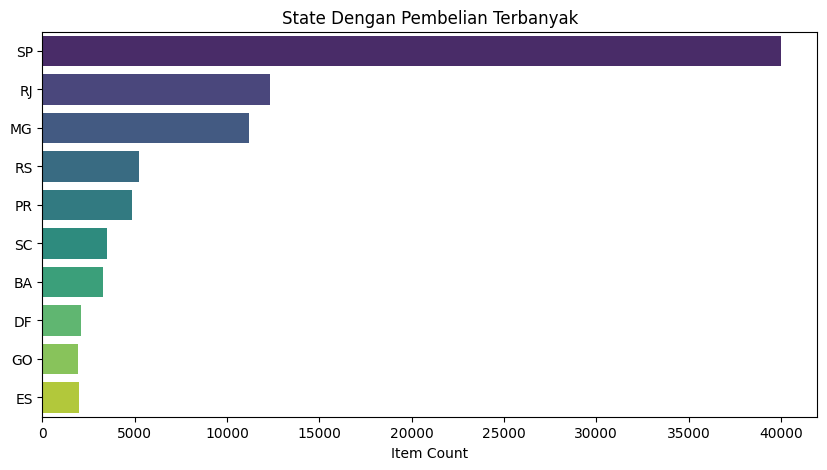

In [41]:
plt.figure(figsize=(10, 5))
sns.barplot(
    data=customer_state.sort_values(by='item_count', ascending=False).head(10),
    x='customer_count',
    hue='customer_state',
    y='customer_state',
    palette='viridis',
    legend=False
)
plt.title('State Dengan Pembelian Terbanyak')
plt.xlabel('Item Count')
plt.ylabel(None)
plt.show()

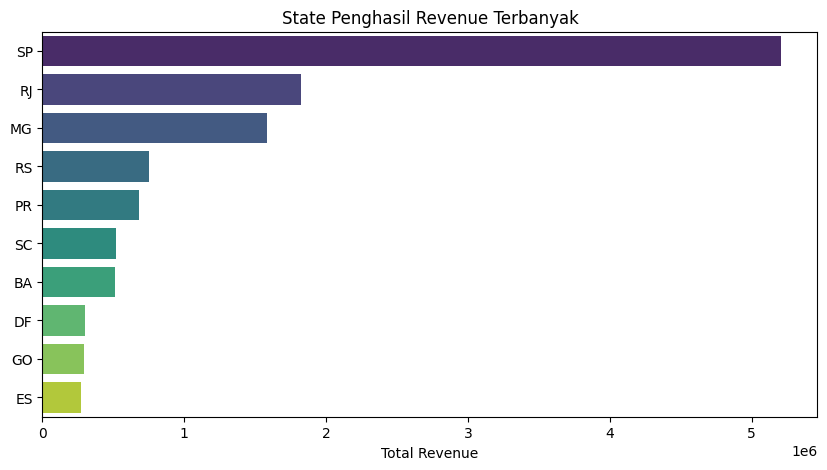

In [42]:
plt.figure(figsize=(10, 5))
sns.barplot(data=customer_state.sort_values(by='total_revenue', ascending=False).head(10),
            x='total_revenue',
            y='customer_state',
            hue='customer_state',
            palette='viridis',
            legend=False)
plt.title('State Penghasil Revenue Terbanyak')
plt.xlabel('Total Revenue')
plt.ylabel(None)
plt.show()


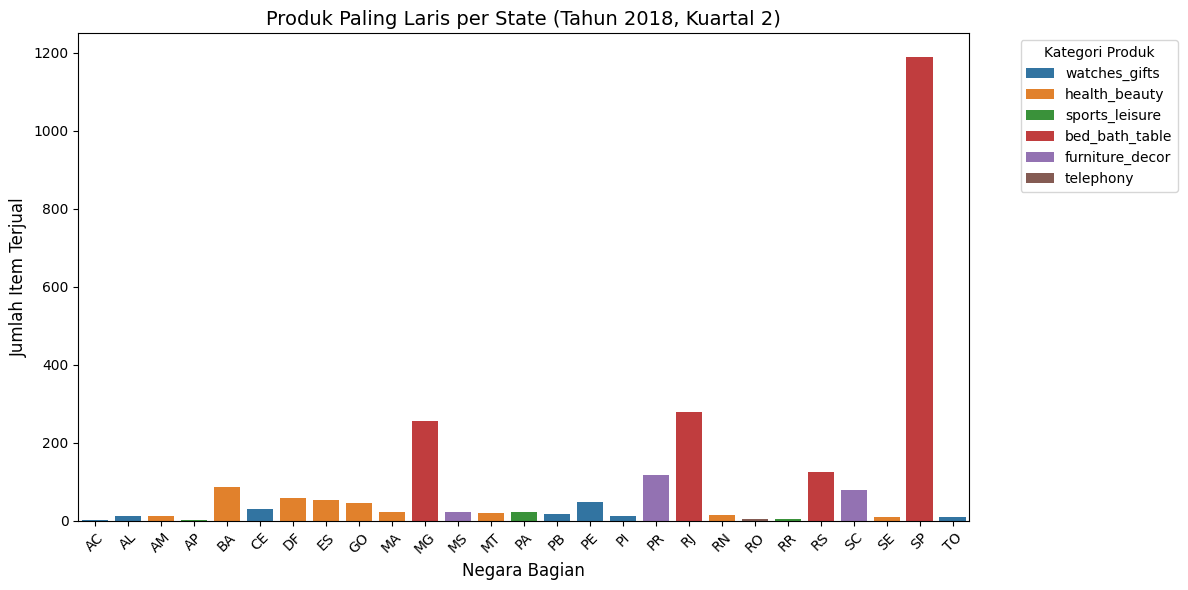

In [43]:
# melihat trend produk paling laris berdasarkan geolokasi dan dari kuartal terakhir
filtered_geolocation_trend = customer_geolocation[(customer_geolocation['year'] == 2018) & (customer_geolocation['quarter'] == 2)]

state_product_sales = filtered_geolocation_trend.groupby(['customer_state', 'product_category_name_english']).agg({
    'order_item_id': 'count'
}).reset_index()

state_popular_products = (
    state_product_sales
    .sort_values(by=['customer_state', 'order_item_id'], ascending=[True, False])
    .groupby('customer_state')
    .first()
    .reset_index()
)
state_popular_products

# Visualisasi menggunakan bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=state_popular_products, x='customer_state', y='order_item_id', hue='product_category_name_english')
plt.title('Produk Paling Laris per State (Tahun 2018, Kuartal 2)', fontsize=14)
plt.xlabel('Negara Bagian', fontsize=12)
plt.ylabel('Jumlah Item Terjual', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Kategori Produk', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# menghitung produk paling laris dari semuanya

##### <u>Insights</u>:

### **Analisis Wawasan Geografis Penjualan dan Revenue**  

#### Tujuan Analisis

Analisis ini bertujuan untuk memahami distribusi pelanggan, volume penjualan, dan kontribusi revenue dari berbagai negara bagian (state) dalam dataset. Dengan pendekatan data-driven, tujuan dari hasil analisis ini adalah memberikan wawasan strategis untuk:

- Mengidentifikasi **area bisnis utama**
- Menemukan **potensi pertumbuhan baru**
- Meningkatkan efisiensi logistik dan pemasaran lokal
- Membangun strategi cross-selling dan retensi pelanggan berbasis wilayah

---

### 1. Distribusi Pelanggan, Pembelian, dan Revenue Berdasarkan State

#### (a) Top 3 State dengan Jumlah Pelanggan Terbanyak
| State | Jumlah Pelanggan |
|-------|------------------|
| SP    | hampir 40.000     |
| RJ    | sekitar 13.000    |
| MG    | sekitar 12.000    |

> Ketiga state ini adalah pusat aktivitas utama platform dan layak mendapat fokus strategi pemasaran dan operasional.

---

#### (b) Top 3 State dengan Volume Pembelian Tertinggi
| State | Jumlah Pembelian |
|-------|------------------|
| SP    | hampir 40.000     |
| RJ    | sekitar 13.000    |
| MG    | sekitar 12.000    |

> Pola jumlah pelanggan langsung berdampak pada frekuensi pembelian — menunjukkan korelasi kuat antara base pelanggan dan transaksi.

---

#### (c) Top 3 State dengan Revenue Tertinggi
| State | Total Revenue |
|-------|----------------|
| SP    | > `$`5.000.000   |
| RJ    | ~ `$`2.000.000   |
| MG    | ~ `$`1.700.000   |

> SP menjadi penyumbang terbesar untuk pendapatan keseluruhan, menjadikannya layak sebagai prioritas utama dalam optimasi produk dan pengalaman belanja.

---

### 2. Insight Utama

#### (a) Korelasi Kuat Antara Pelanggan, Pembelian, dan Revenue
- Ada hubungan langsung antara jumlah pelanggan, frekuensi belanja, dan total revenue.
- State dengan basis pelanggan besar seperti **SP, RJ, dan MG** mendominasi semua metrik bisnis.

> **Insight**: Fokus pada ekspansi dan retensi pelanggan di ketiga wilayah ini akan berdampak langsung pada pertumbuhan bisnis.

---

#### (b) Potensi Tinggi di State GO
- Meskipun hanya memiliki sekitar **2.000 pelanggan**, **GO** berhasil mencatatkan:
  - **2.000 unit terjual**
  - Revenue mendekati **$300.000**

> **Insight**: Ini menunjukkan tingkat konversi dan nilai belanja per pelanggan yang tinggi — tanda bahwa produk dan harga sesuai dengan kebutuhan pasar lokal.

---

#### (c) Produk Rumah Tangga Mendominasi di Seluruh Wilayah
- Pada Q2 2018, produk **bed_bath_table** menjadi best seller di **SP, RJ, dan MG**.
- Kategori ini mencerminkan permintaan stabil dan relevansi tinggi di seluruh wilayah dengan populasi pelanggan yang besar.

> **Insight**: `bed_bath_table` adalah fokus utama untuk kampanye bundling dan cross-selling di seluruh wilayah.

---

### 3. Rekomendasi Strategis

- **Optimalkan Wilayah Besar (SP, RJ, MG)**:  
 SP adalah penyumbang terbesar dalam hal pelanggan, pembelian, dan revenue. Jalankan kampanye massal di SP dan personalisasi di RJ/MG untuk meningkatkan engagement. Pastikan stok `bed_bath_table` tersedia secara konsisten.

-  **Eksploitasi Konversi Tinggi (GO)**:  
 GO memiliki konversi tinggi meski jumlah pelanggan rendah, lakukan riset pasar untuk memahami faktor unik di GO. Replikasikan strategi sukses tersebut di wilayah dengan populasi pelanggan serupa seperti ES dan DF.

- **Fokus pada Wilayah Potensial (ES, DF)**:  
 ES dan DF memiliki pola penjualan dan revenue mirip dengan GO, meskipun jumlah pelanggan lebih sedikit. Bangun brand awareness melalui promosi lokal dan optimalkan pengalaman belanja pelanggan baru.

- **Inovasi Produk Rumah Tangga**:  
 `bed_bath_table` adalah produk paling laris di wilayah utama, luncurkan varian baru atau paket premium untuk meningkatkan AOV (Average Order Value). Tambahkan opsi bundling dengan kategori terkait seperti `furniture_decor`.

- **Efisiensi Logistik dan Operasional**:  
  Wilayah dengan volume tinggi seperti SP menghadapi risiko masalah operasional dan ulasan negatif. Evaluasi ulang sistem logistik dan integrasi seller untuk memastikan pembaruan status pesanan dan pengiriman tepat waktu.

---

### 4. Kesimpulan Akhir

Analisis ini berhasil mengidentifikasi bahwa:

- **SP, RJ, dan MG** adalah **tiga state utama** yang mendukung pertumbuhan bisnis karena jumlah pelanggan dan volume transaksi yang tinggi.
- **GO** menunjukkan potensi besar dengan **konversi tinggi** meskipun jumlah pelanggan masih rendah.
- **Produk rumah tangga (`bed_bath_table`)** sangat diminati di seluruh wilayah dan layak menjadi fokus utama kampanye pemasaran dan promosi bundling.

Dengan implementasi rekomendasi strategis ini, diharapkan bisnis dapat:
- Meningkatkan revenue melalui personalisasi dan inovasi produk
- Memperluas pasar di wilayah dengan potensi tinggi
- Meningkatkan efisiensi logistik dan kepuasan pelanggan

---

## Analisis Perilaku Pelanggan

### **Segmentasi Pelanggan Menggunakan Metode RFM**

#### Features Engineering

In [44]:
# mendapatkan value Recency: seberapa baru pembelian terakhir
reference_date = orders_comprehensive_df_cleaned['order_purchase_timestamp'].max() # menghitung periode akhir analisis

recency_df = customer_geolocation.groupby(by='customer_unique_id')['order_purchase_timestamp'].max().reset_index() # mendapatkan waktu terakhir pelanggan melakukan transaksi
recency_df['recency'] = (reference_date - recency_df['order_purchase_timestamp']).dt.days # menghitung nilai recency
recency_df.drop(columns=['order_purchase_timestamp'], inplace=True) # drop kolom yang usang

# mendapatkan value Frequency: seberapa sering pelanggan membeli
frequency_df = customer_geolocation.groupby(by='customer_unique_id')['order_id'].nunique().reset_index() # mendapatkan frekuensi pembelian pelanggan
frequency_df.rename(columns={'order_id': 'frequency'}, inplace=True) # ganti nama kolom agar sesuai

# mendapatkan value Monetary: total pengeluaran pelanggan
monetary_df = customer_geolocation.groupby(by='customer_unique_id')['price'].sum().reset_index() # mendapatkan total uang yang telah dibelanjakan pelanggan
monetary_df.rename(columns={'price': 'monetary'}, inplace=True) # mengganti nama kolom agar sesuai

# buat data rfm dengan menggabungkan semuanya
rfm_df = recency_df.merge(frequency_df, on='customer_unique_id').merge(monetary_df, on='customer_unique_id') # gabungkan semua data menjadi rfm_df

rfm_df.describe(include='all') # tampilkan hasil

,customer_unique_id,recency,frequency,monetary
count,95420,95420.000000,95420.000000,95420.000000
unique,95420,NaN,NaN,NaN
top,ffffd2657e2aad2907e67c3e9daecbeb,NaN,NaN,NaN
freq,1,NaN,NaN,NaN
mean,NaN,242.600377,1.034018,142.440198
std,NaN,153.160320,0.211234,217.656355
min,NaN,0.000000,1.000000,0.850000
25%,NaN,118.000000,1.000000,47.900000
50%,NaN,223.000000,1.000000,89.900000
75%,NaN,352.000000,1.000000,155.000000


In [45]:
# lakukan scoring pada pelanggan berdasarkan recency, kedalam 5 segmen
recency_bins = [0, 100, 270, 360, 500, float('inf')]
rfm_df['recency_score'] = pd.qcut(rfm_df['recency'], q=5, labels=[5, 4, 3, 2, 1])

# lakukan scoring pada pelanggan berdasarkan frequency
frequency_bins = [0, 1, 2, 4, 8, float('inf')] # rule untuk scoring frequency
frequency_labels = [1, 2, 3, 4, 5] # klasifikasikan kedalam 5 label

rfm_df['frequency_score'] = pd.cut(rfm_df['frequency'], bins=frequency_bins, labels=frequency_labels) # terapkan scoring

# lakukan scoring pada pelanggan berdasarkan monetary
monetary_bins = [0, 50, 100, 200, 500, float('inf')] # rule untuk scoring monetary
monetary_labels = [1, 2, 3, 4, 5] # masukan kedalam 5 label

rfm_df['monetary_score'] = pd.cut(rfm_df['monetary'], bins=monetary_bins, labels=monetary_labels) # terapkan scoring

# buat rfm_score keseluruhan dengan menggabungkan ketiga feature yang ada
rfm_df['rfm_score'] = rfm_df[['recency_score',
                              'frequency_score',
                              'monetary_score'
]].sum(axis=1)

# buat aturan untuk segmentasi pelanggan berdasarkan besarnya rfm_score
segmentation_rules = {
    'champion' : lambda x: x >= 13,
    'loyal' : lambda x: 10 <= x < 13,
    'potential loyalist' : lambda x: 7 <= x < 10,
    'at risk' : lambda x: 4 <= x < 7,
    'lost' : lambda x: x < 4
}

# fungsi untuk menerapkan segmentasi
def segment_customers(row):
  for segment, rule in segmentation_rules.items():
    if rule(row['rfm_score']):
      return segment

rfm_df['segment'] = rfm_df.apply(segment_customers, axis=1) # terapkan segmentasi
rfm_df

,customer_unique_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,rfm_score,segment
0,0000366f3b9a7992bf8c76cfdf3221e2,115,1,129.90,4,1,3,8,potential loyalist
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,18.90,4,1,1,6,at risk
2,0000f46a3911fa3c0805444483337064,541,1,69.00,1,1,2,4,at risk
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,25.99,2,1,1,4,at risk
4,0004aac84e0df4da2b147fca70cf8255,292,1,180.00,2,1,3,6,at risk
...,...,...,...,...,...,...,...,...,...
95415,fffcf5a5ff07b0908bd4e2dbc735a684,451,1,1570.00,1,1,5,7,potential loyalist
95416,fffea47cd6d3cc0a88bd621562a9d061,266,1,64.89,3,1,2,6,at risk
95417,ffff371b4d645b6ecea244b27531430a,572,1,89.90,1,1,2,4,at risk
95418,ffff5962728ec6157033ef9805bacc48,123,1,115.00,4,1,3,8,potential loyalist


#### Visualisasi Segmentasi Pelanggan Dari Metode RFM

In [ ]:
# hitung distribusi untuk setiap segmen
print(rfm_df['segment'].value_counts())

segment
at risk               44352
potential loyalist    40910
lost                   5711
loyal                  4421
champion                 26
Name: count, dtype: int64


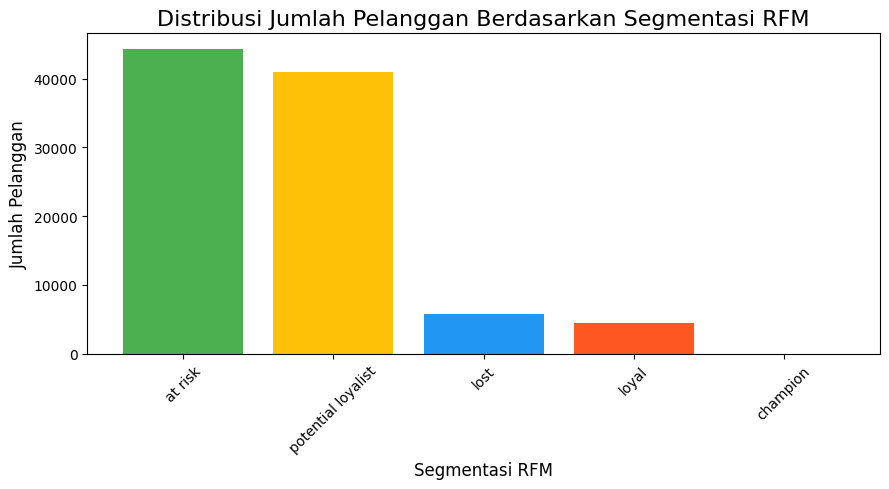

In [46]:
import matplotlib.pyplot as plt

# Hitung jumlah pelanggan per segmentasi
segment_counts = rfm_df['segment'].value_counts()

# Buat bar chart
plt.figure(figsize=(9, 5))
plt.bar(segment_counts.index, segment_counts.values, color=['#4CAF50', '#FFC107', '#2196F3', '#FF5722', '#9E9E9E'])
plt.xlabel('Segmentasi RFM', fontsize=12)
plt.ylabel('Jumlah Pelanggan', fontsize=12)
plt.title('Distribusi Jumlah Pelanggan Berdasarkan Segmentasi RFM', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()

# Tampilkan bar chart
plt.show()

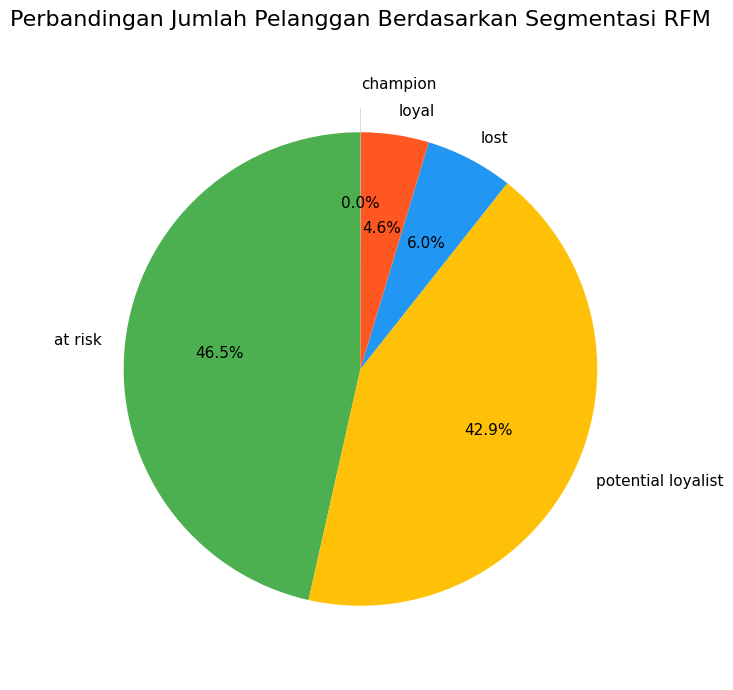

In [47]:
# Hitung jumlah pelanggan per segmentasi
segment_counts = rfm_df['segment'].value_counts()

# Persiapkan data untuk pie chart
labels = segment_counts.index  # Kategori segmentasi (e.g., champion, loyal, etc.)
sizes = segment_counts.values  # Jumlah pelanggan di setiap kategori
colors = ['#4CAF50', '#FFC107', '#2196F3', '#FF5722', '#9E9E9E']  # Warna untuk setiap segmen
explode = [0.1 if label == 'champion' else 0 for label in labels]  # Sorot segmen 'champion'

# Buat pie chart
plt.figure(figsize=(7, 7))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',  # Tampilkan persentase
    startangle=90,      # Sudut awal pie chart
    colors=colors,
    explode=explode,     # Sorot segmen 'champion'
    textprops={'fontsize': 11}  # Ukuran font label
)

# Judul dan tata letak
plt.title('Perbandingan Jumlah Pelanggan Berdasarkan Segmentasi RFM', fontsize=16)
plt.axis('equal')  # Pastikan pie chart berbentuk lingkaran sempurna
plt.tight_layout()

# Tampilkan pie chart
plt.show()

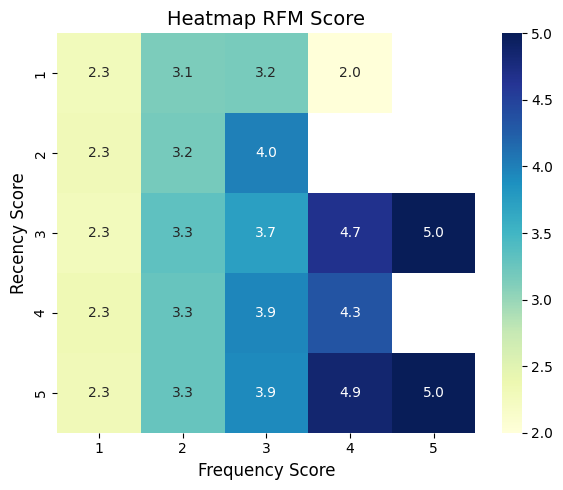

In [48]:
# ubah tipe kolom yang awalnya categoric menjadi numeric
target = ['recency_score', 'frequency_score', 'monetary_score']
for column in target:
  rfm_df[column] = pd.to_numeric(rfm_df[column], errors='coerce')

# Pivot tabel untuk heatmap
heatmap_data = rfm_df.pivot_table(index='recency_score', columns='frequency_score', values='monetary_score', aggfunc='mean')

# Visualisasi heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='YlGnBu')
plt.title('Heatmap RFM Score', fontsize=14)
plt.xlabel('Frequency Score', fontsize=12)
plt.ylabel('Recency Score', fontsize=12)
plt.tight_layout()
plt.show()

##### <u>Insights</u>:

### **Analisis Segmentasi Pelanggan dengan Pendekatan RFM**

### Tujuan Analisis

Analisis ini bertujuan untuk memahami perilaku pelanggan berdasarkan tiga parameter utama:
- **Recency (R)**: Kapan terakhir kali pelanggan berbelanja
- **Frequency (F)**: Seberapa sering pelanggan melakukan pembelian
- **Monetary (M)**: Berapa banyak uang yang telah dikeluarkan oleh pelanggan

Dengan menggunakan pendekatan **RFM Analysis**, pelanggan dibagi ke dalam lima segmen utama, memberikan wawasan strategis untuk meningkatkan retensi, engagement, dan nilai dari pelanggan.

---

### 1. Distribusi Segmen Pelanggan

| Segmen | Persentase | Deskripsi |
|--------|------------|-----------|
| **Champion** | <0.1% (26 pelanggan) | Pelanggan paling aktif dan loyal — jarang tapi bernilai tinggi. |
| **Loyal** | 4.6% | Pelanggan setia yang sering belanja tetapi belum mencapai level Champion. |
| **Potential Loyalist** | 42.9% | Pelanggan dengan potensi besar menjadi loyal jika diberikan perhatian lebih. |
| **At Risk** | 46.5% | Pelanggan jarang belanja atau sudah lama tidak aktif. |
| **Lost** | 6% | Pelanggan yang kemungkinan besar sudah tidak tertarik lagi. |

> Mayoritas pelanggan (89.4%) termasuk dalam kategori **At Risk** dan **Potential Loyalist**, menunjukkan bahwa platform memiliki basis pelanggan yang besar namun kurang loyal.

---

### 2. Insight Utama dari Distribusi Segmen

#### (a) Dominasi At Risk dan Potential Loyalist
- Hampir **setengah dari total pelanggan** masuk ke dalam kategori **At Risk**.
- Sekitar **43% pelanggan adalah Potential Loyalist**, yaitu mereka yang punya potensi besar untuk menjadi loyal jika diberikan treatment yang tepat.

>  
- Ini bukanlah pelanggan baru, melainkan **pelanggan yang hampir hilang** atau bisa dikembangkan menjadi loyal.
- Mereka masih menyimpan hubungan dengan brand, sehingga layak mendapat fokus retensi.

---

#### (b) Minimnya Pelanggan Champion dan Loyal
- Hanya **26 pelanggan** (kurang dari 0.1%) yang masuk dalam kategori **Champion**.
- **Loyal** hanya **4.6%**, meskipun frekuensi belanja mereka cukup tinggi.

> **Insight**:
- Platform e-commerce menghadapi tantangan dalam mempertahankan pelanggan aktif.
- Penting untuk mengidentifikasi faktor-faktor yang membuat beberapa pelanggan tetap aktif dan loyal, agar bisa direplikasi ke pelanggan lain.

---

#### (c) Pelanggan Lost Masih Bisa Dipulihkan
- Meskipun proporsinya relatif kecil (**6%**), ada kemungkinan sebagian dari pelanggan **Lost** masih bisa dijangkau kembali melalui pendekatan personal.

>  
Jika dilakukan kampanye win-back yang tepat sasaran, beberapa pelanggan dapat kembali aktif dan diharapkan menjadi pelanggan loyal.

---

### 3. Pola Perilaku Pelanggan Berdasarkan Heatmap

#### (a) Frekuensi dan Recency sebagai Penggerak Utama Nilai Moneter
- Pelanggan dengan **frekuensi rendah (skor 1)** cenderung menghabiskan sedikit uang, terlepas dari recency mereka.
- Namun, pelanggan dengan **frekuensi tinggi (skor ≥2)** menghabiskan lebih banyak uang jika mereka baru-baru ini berbelanja (recency tinggi).

>
Frekuensi dan recency adalah dua indikator utama dalam memprediksi nilai moneter pelanggan.  
→ Fokus pada kedua faktor ini akan meningkatkan revenue secara signifikan.

---

#### (b) Ada Segmen Bulk Buyer Tersembunyi
- Beberapa pelanggan dengan **recency rendah** tetap menghabiskan jumlah besar jika frekuensi pembelian mereka tinggi (>3x).
- Kelompok ini kemungkinan besar adalah **bulk buyer**.

> **Insight Bisnis**:  
Identifikasi kelompok ini dan tawarkan solusi grosir atau kontrak kerja sama untuk menjaga hubungan jangka panjang.

---

### 4. Rekomendasi Strategis

- **Retensi Pelanggan Massal**:  
  > 46.5% pelanggan At Risk + 6% pelanggan Lost = 52.5% pelanggan yang hampir hilang.

  Jalankan **kampanye win-back** dengan penawaran spesial, voucher diskon, dan promosi personal berbasis riwayat belanja.

- **Peningkatan Engagement Potential Loyalist**:  
  Potential Loyalist adalah pelanggan yang dekat dengan loyalitas. Bangun **program loyalitas** dengan reward berbasis transaksi dan personalisasi pengalaman belanja.

- **Perluasan Base Loyal Customer**:  
  Loyal hanya 4.6%, dan Champion sangat kecil. Lakukan **follow-up pasca pembelian**, email marketing personal, dan program referral untuk meningkatkan engagement pelanggan.

- **Personalisasi untuk Champion**:  
  Champion sangat langka namun bernilai tinggi. Tawarkan **layanan prioritas, produk premium, atau akses eksklusif** untuk memperkuat hubungan.

- **Segmentasi Berbasis RFM untuk Marketing Automation**:  
   RFM score bisa digunakan untuk memahami perilaku belanja. Gunakan skor RFM untuk mempersonalisasi email marketing, rekomendasi produk, dan retargeting ads.

---

### 5. Kesimpulan Akhir

Analisis RFM ini berhasil mengidentifikasi bahwa:

- **Sebagian besar pelanggan (89.4%)** berada dalam kategori **At Risk** dan **Potential Loyalist**, menunjukkan perlunya strategi retensi dan engagement yang lebih kuat.
- **Hanya 4.7% pelanggan yang dikategorikan loyal atau champion**, mengindikasikan tantangan dalam membangun hubungan jangka panjang dengan pelanggan.
- **Frekuensi dan recency** adalah dua faktor utama yang memengaruhi nilai transaksi rata-rata pelanggan.

Dengan implementasi rekomendasi strategis ini, bisnis dapat:
- Meningkatkan **retensi pelanggan**
- Memperluas base pelanggan **loyal**
- Meningkatkan **AOV (Average Order Value)** melalui personalisasi
- Menjalin hubungan jangka panjang dengan **bulk buyer**

---

### **Analisis Sentimen Pelanggan**

In [60]:
# masukan data untuk analisis kedalam variabel baru
all_sentiment = orders_comprehensive_df.drop(columns=['order_item_id', 'product_id', 'shipping_limit_date', 'price', 'freight_value'])

# buat kolom baru untuk keterangan rentang waktu
all_sentiment['year'] = all_sentiment['order_purchase_timestamp'].dt.year
all_sentiment['month'] = all_sentiment['order_purchase_timestamp'].dt.month
all_sentiment['quarter'] = all_sentiment['order_purchase_timestamp'].dt.quarter

# gabungkan dengan data lain untuk mendapatkan data cusotmer
all_sentiment = all_sentiment.merge(customers_df.drop(columns=['customer_zip_code_prefix']),
                              on='customer_id',
                              how='left')

all_sentiment = all_sentiment.merge(order_reviews_df_cleaned,
                              on='order_id',
                              how='left')

# cleaning data
all_sentiment['product_category_name_english'] = all_sentiment['product_category_name_english'].fillna('unavailable') # isi nama kategori yang tidak ada (karena produk tidak ada / dilakukan cancel)

all_sentiment = all_sentiment.dropna(subset='review_score') # drop kolom review score yang kosong (karena pelanggan tidak memberikan review)

all_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113131 entries, 0 to 114091
Data columns (total 17 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       113131 non-null  object        
 1   customer_id                    113131 non-null  object        
 2   order_status                   113131 non-null  object        
 3   order_purchase_timestamp       113131 non-null  datetime64[ns]
 4   product_category_name_english  113131 non-null  object        
 5   year                           113131 non-null  int32         
 6   month                          113131 non-null  int32         
 7   quarter                        113131 non-null  int32         
 8   customer_unique_id             113131 non-null  object        
 9   customer_city                  113131 non-null  object        
 10  customer_state                 113131 non-null  object        
 11  revie

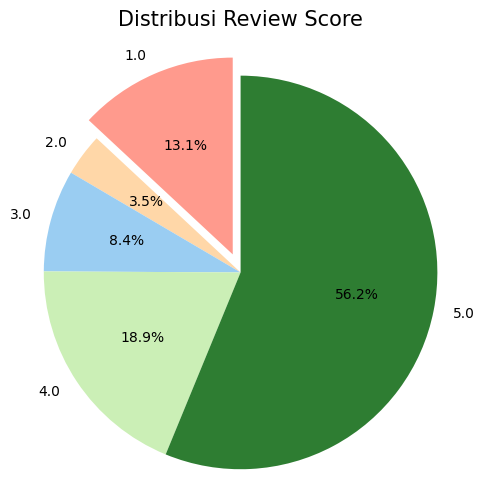

In [69]:
# Menghitung frekuensi setiap nilai review_score
review_scores = all_sentiment['review_score'].value_counts().sort_index()

# Persiapkan data untuk pie chart
labels = review_scores.index  # Nilai review_score (1-5)
sizes = review_scores.values  # Jumlah review untuk setiap nilai score
colors = ['#FF9A8D', '#FFD7A8', '#9ACDF2','#CBEFB6', '#2E7D32']  # Palet warna lembut, hijau tua untuk skor 5
explode = [0.1 if score == 1 else 0 for score in labels]  # Sorot skor 1 (ulasan buruk)

# Buat pie chart dengan ukuran kecil
plt.figure(figsize=(5, 5))  # Ukuran plot diperkecil
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',  # Tampilkan persentase
    startangle=90,      # Sudut awal pie chart
    colors=colors,
    explode=explode,
    textprops={'fontsize': 10}  # Ukuran font label diperkecil
)

# Judul dan tata letak
plt.title('Distribusi Review Score', fontsize=15, pad=15)  # Ukuran judul diperkecil
plt.axis('equal')  # Pastikan pie chart berbentuk lingkaran sempurna
plt.tight_layout()

# Tampilkan pie chart
plt.show()

In [62]:
# mengelompokan sentimen kedalam grup Positif, Negatif, Netral

sentiment_bins = [0, 2, 3, 5]
sentiment_labels = ['negative', 'neutral', 'positive']

all_sentiment['sentiment'] = pd.cut(all_sentiment['review_score'], bins=sentiment_bins, labels=sentiment_labels)

# Buat kolom gabungan tahun dan quarter
all_sentiment['year_quarter'] = all_sentiment['year'].astype(str) + '-Q' + all_sentiment['quarter'].astype(str)

# Urutkan data berdasarkan urutan waktu
quarter_order = ['2016-Q3', '2016-Q4', '2017-Q1', '2017-Q2', '2017-Q3', '2017-Q4',
                 '2018-Q1', '2018-Q2', '2018-Q3', '2018-Q4']

all_sentiment['year_quarter'] = pd.Categorical(all_sentiment['year_quarter'], categories=quarter_order, ordered=True)

In [63]:
# Hitung jumlah ulasan per kategori sentimen per year_quarter
sentiment_by_quarter = (
    all_sentiment.groupby('year_quarter', observed=False)['sentiment']
              .value_counts()
              .unstack(fill_value=0)
              .reindex(quarter_order, fill_value=0)
              .reset_index()
)
sentiment_by_quarter = sentiment_by_quarter.drop([0, 8, 9])
sentiment_by_quarter

sentiment,year_quarter,negative,neutral,positive
1,2016-Q4,117,27,234
2,2017-Q1,949,559,4489
3,2017-Q2,1510,916,8058
4,2017-Q3,1954,1098,11343
5,2017-Q4,3836,1809,14781
6,2018-Q1,5344,2264,16573
7,2018-Q2,3213,1773,17898


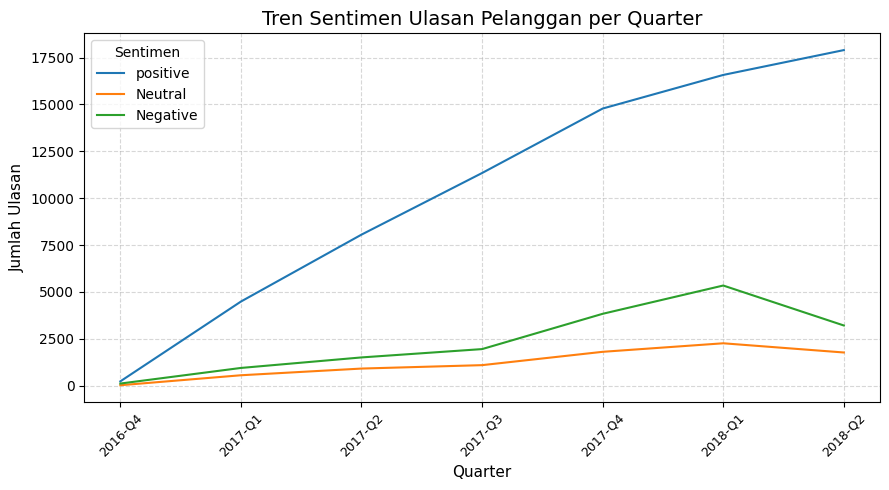

In [64]:
# Plot
plt.figure(figsize=(9, 5))
sns.lineplot(data=sentiment_by_quarter, x='year_quarter', y='positive', label='positive')
sns.lineplot(data=sentiment_by_quarter, x='year_quarter', y='neutral', label='Neutral')
sns.lineplot(data=sentiment_by_quarter, x='year_quarter', y='negative', label='Negative')

# Custom
plt.title('Tren Sentimen Ulasan Pelanggan per Quarter', fontsize=14)
plt.xlabel('Quarter', fontsize=11)
plt.ylabel('Jumlah Ulasan', fontsize=11)
plt.xticks(rotation=45, fontsize=9)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend(title='Sentimen')
plt.show()

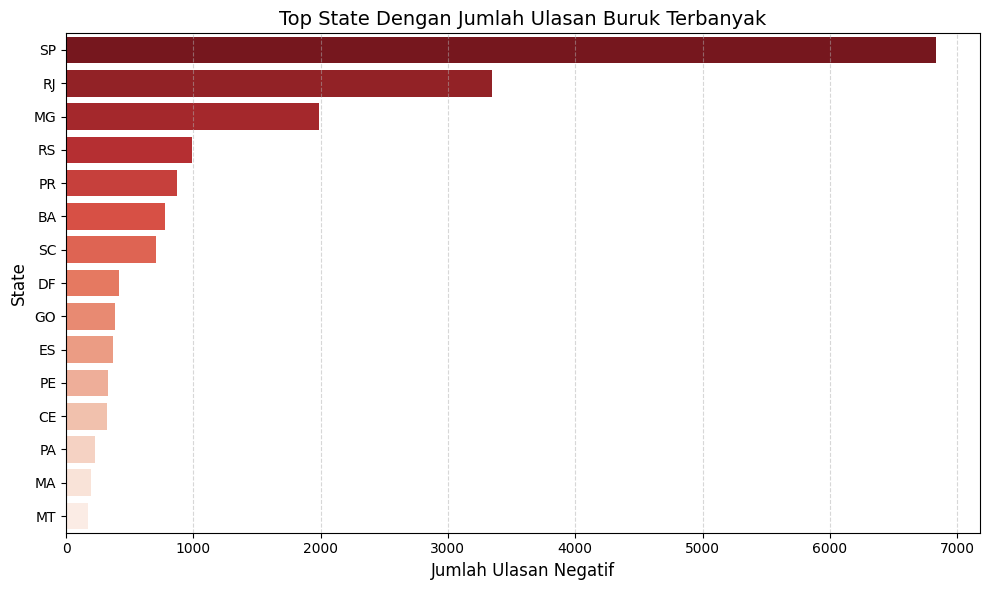

In [70]:
negative_state = all_sentiment[all_sentiment['sentiment'] == 'negative'].groupby(
                  'customer_state').agg({'sentiment': 'count'}).reset_index()

# Urutkan data berdasarkan jumlah ulasan negatif secara descending
negative_state_sorted = negative_state.sort_values(by='sentiment', ascending=False).head(15)

# Buat bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=negative_state_sorted, x='sentiment', y='customer_state', palette='Reds_r', hue='customer_state', legend=False)

# Custom tampilan
plt.title('Top State Dengan Jumlah Ulasan Buruk Terbanyak', fontsize=14)
plt.xlabel('Jumlah Ulasan Negatif', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [66]:
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

# Pilih data dengan review negatif
negative_sentiment = all_sentiment[all_sentiment['sentiment'] == 'negative']
negative_sentiment['review_comment_title']

# Download stopwords jika belum pernah download sebelumnya
nltk.download('stopwords')

def clean_text(text):
    if isinstance(text, str):  # Pastikan input berupa string
        text = text.lower()  # Ubah ke huruf kecil semua
        text = re.sub(r'[^\w\s]', '', text)  # Hapus tanda baca
        text = re.sub(r'\d+', '', text)  # Hapus angka
        text = re.sub(r'\s+', ' ', text).strip()  # Hapus spasi berlebih
        return text
    else:
        return ''

negative_sentiment['cleaned_comment_message'] = negative_sentiment['review_comment_message'].apply(clean_text)

# Definisikan stopwords bahasa Indonesia
stop_words = set(stopwords.words('portuguese') + stopwords.words('english'))  # Jika ada campuran bahasa

# Fungsi untuk tokenisasi dan hapus stopwords
def tokenize_and_remove_stopwords(text):
    tokens = text.split()
    filtered = [word for word in tokens if word not in stop_words]
    return filtered

# Terapkan ke kolom teks bersih
negative_sentiment['tokens'] = negative_sentiment['cleaned_comment_message'].apply(tokenize_and_remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-66-aabb3490a7e9>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_sentiment['cleaned_comment_message'] = negative_sentiment['review_comment_message'].apply(clean_text)
<ipython-input-66-aabb3490a7e9>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_sentiment['tokens'] = negative_sentiment['cleaned_comment_message'].apply(tokenize_and_remove_stopwords)


In [67]:
from collections import Counter

# Gabung semua kata dari semua baris
all_words = [word for sublist in negative_sentiment['tokens'] for word in sublist]

# Hitung frekuensi
word_counts = Counter(all_words)

# Konversi ke DataFrame
word_freq_df = pd.DataFrame(word_counts.most_common(20), columns=['Kata', 'Frekuensi'])

# hapus kata 'none'
word_freq_df = word_freq_df.drop([0])

# translate bahasa portugis ke indonesia
translate = ['produk', 'diterima', 'disarankan', 'pengiriman', 'tidak', 'terkirim', 'rusak', 'salah',
             'dipesan', 'sampai(ke tujuan)', 'datang', 'hilang', 'buruk', 'belum', 'cacat', 'tidak lengkap',
             'kurang', 'sangat' 'buruk', 'tertunda']

word_freq_df['Terjemahan'] = translate

# Tampilkan hasil
word_freq_df

,Kata,Frekuensi,Terjemahan
1,recebi,4775,produk
2,none,4389,diterima
3,comprei,2950,disarankan
4,veio,2115,pengiriman
5,entregue,1862,tidak
6,ainda,1770,terkirim
7,entrega,1692,rusak
8,chegou,1538,salah
9,nao,1228,dipesan
10,pedido,1227,sampai(ke tujuan)


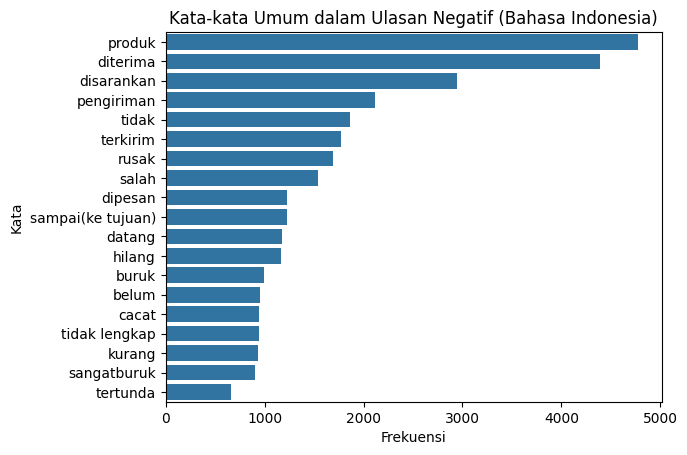

In [68]:
# visualisasikan distribusi
sns.barplot(data=word_freq_df, x='Frekuensi', y='Terjemahan')
plt.title('Kata-kata Umum dalam Ulasan Negatif (Bahasa Indonesia)')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.show()

##### <u>Insights</u>:

### **Analisis Sentimen Pelanggan**  

#### Tujuan Analisis

Analisis ini bertujuan untuk memahami persepsi pelanggan berdasarkan ulasan mereka di platform e-commerce. Dengan menggunakan kombinasi pendekatan kuantitatif (`review_score`) dan kualitatif (`review_comment_title`, `review_comment_message`), kita dapat mengidentifikasi:
- Tingkat kepuasan pelanggan secara keseluruhan.
- Faktor utama penyebab ketidakpuasan.
- Insight strategis untuk meningkatkan pengalaman belanja dan retensi pelanggan.

---

### 1. Distribusi Skor Ulasan (Review Score)

Dari seluruh data `review_score` (skala 1–5):

| Skor | Persentase | Kategori |
|------|------------|----------|
| 5    | 56%        | Sangat Positif |
| 4    | 18.9%      | Positif |
| 3    | 8.4%       | Netral |
| 2    | 3.5%       | Negatif |
| 1    | 13.1%      | Sangat Negatif |

>  
- Lebih dari **74% pelanggan memberikan ulasan positif**, menunjukkan tingkat kepuasan yang cukup baik.  
- Namun, hampir **17% ulasan bersifat negatif**, mengindikasikan adanya masalah operasional yang perlu segera diperbaiki.

---

### 2. Tren Sentimen Per Quarter (Q4 2016 – Q2 2018)

Tren sentimen pelanggan menunjukkan pola dinamis sepanjang periode:

- Jumlah ulasan meningkat seiring waktu, sejalan dengan pertumbuhan jumlah pelanggan dan transaksi.
- **Ulasan positif** selalu mendominasi, namun **ulasan negatif** mencapai puncaknya pada **Q1 2018** sebelum menurun secara bertahap.

>  
**Insight**
- Lonjakan ulasan negatif di awal 2018 diduga kuat disebabkan oleh:
  - Peningkatan volume pesanan tanpa peningkatan kapasitas logistik.
  - Masalah fulfillment seller dan ketidaksiapan infrastruktur.
- Penurunan setelahnya mungkin merupakan hasil dari intervensi internal terhadap sistem pengiriman atau layanan pelanggan.

---

### 3. Analisis Geografis: State dengan Ulasan Buruk Terbanyak

Ini adalah wilayah dengan proporsi ulasan buruk yang paling tinggi:

| State | Insight Utama |
|-------|----------------|
| SP (São Paulo) | Paling banyak ulasan buruk, meski menjadi top contributor pelanggan dan revenue. |
| RJ (Rio de Janeiro) | Mendekati SP, dengan proporsi ulasan negatif yang signifikan. |
| MG (Minas Gerais) | Memiliki jumlah ulasan buruk pada posisi ketiga paling tinggi. |

#### **Penyebab Potensial**
- Volume transaksi besar = risiko operasional lebih tinggi.
- Potensi masalah lokal dalam sistem logistik dan pemenuhan order.

#### **Rekomendasi Prioritas**
- Lakukan evaluasi menyeluruh terhadap mitra logistik di wilayah tersebut.
- Bangun sistem monitoring real-time untuk identifikasi keluhan pelanggan.
- Jalankan kampanye retensi untuk memperbaiki kepercayaan pelanggan.

---

### 4. Analisis Kata-Kata dalam Ulasan Negatif

Melalui analisis frekuensi kata dalam teks ulasan buruk (`review_comment_message`), ditemukan beberapa kata utama:

| Kata Utama         | Insight Terkait Keluhan Pelanggan |
|--------------------|----------------------------------|
| produk             | Banyak keluhan merujuk pada kualitas atau deskripsi produk tidak sesuai ekspektasi. |
| diterima           | Indikator utama keterlambatan atau kegagalan pengiriman. |
| pengiriman         | Masalah besar pada rantai pasokan dan ekspedisi. |
| rusak / cacat      | Produk sampai dalam kondisi rusak atau cacat. |
| salah              | Seller mengirimkan barang yang tidak sesuai pesanan. |
| tidak              | Digunakan dalam kalimat negatif untuk menggambarkan ketidakpuasan umum. |
| disarankan         | Beberapa pelanggan menyampaikan bahwa produk tidak direkomendasikan. |

#### **Kesimpulan**
Masalah yang paling sering muncul dalam ulasan negatif adalah:
1. **Produk tidak diterima** atau **terlambat dikirim**.
2. **Barang hilang selama proses pengiriman**.
3. **Produk rusak, cacat, atau berkualitas rendah**.
4. **Seller mengirimkan produk yang salah atau tidak tersedia**.

Ini mengindikasikan bahwa platform harus melakukan evaluasi menyeluruh pada:
- Sistem tracking dan notifikasi pengiriman.
- Quality control seller dan produk.
- Pengemasan dan perlindungan saat distribusi.

---

### 5. Rekomendasi Strategis

| Area | Insight | Rekomendasi Prioritas |
|------|--------|------------------------|
| **Logistik & Pengiriman** | Masalah pengiriman adalah penyebab utama ulasan negatif | Gunakan sistem pelacakan otomatis dan notifikasi real-time kepada pelanggan.<br> Evaluasi ulang mitra logistik yang sering gagal update status atau telat mengirim. |
| **Quality Control Seller** | Seller sering kali mengirimkan produk yang salah atau tidak tersedia | Lakukan audit internal dan bangun sistem verifikasi otomatis sebelum pesanan bisa diproses lebih lanjut. |
| **Pengemasan & Perlindungan Produk** | Banyak keluhan tentang produk rusak/cacat | Pastikan packaging cukup kuat dan lakukan sampling ulasan untuk evaluasi kualitas item. |
| **Customer Support Proaktif** | Ulasan buruk menunjukkan kurangnya respons cepat dari tim support | Bangun sistem ticketing otomatis dan respon proaktif untuk pelanggan dengan ulasan negatif. |
| **Program Retensi & Win-Back** | Pelanggan dengan ulasan buruk memiliki risiko churn tinggi | Kirim voucher diskon atau penawaran personal untuk mendorong pelanggan kembali bertransaksi. |
| **Segmentasi Wilayah Prioritas** | SP, RJ, dan MG menghasilkan ulasan buruk tertinggi | Lakukan riset pasar lokal dan optimalkan pengalaman belanja pelanggan baru dan lama. |

---

### 6. Kesimpulan Akhir

Dari hasil analisis ini, didapatkan kesimpulan:

- **Lebih dari 74% ulasan bersifat positif**, menunjukkan bahwa mayoritas pelanggan puas dengan platform.
- Namun, **hampir 17% ulasan bersifat negatif**, dan dominasi ulasan bintang 1 menunjukkan bahwa kekecewaan pelanggan bersifat ekstrem — bukan sekadar ketidakpuasan ringan.
- **Lonjakan ulasan negatif pada Q1 2018** mengindikasikan bahwa peningkatan volume transaksi tidak dibarengi peningkatan kapasitas operasional.
- **SP, RJ, dan MG** adalah wilayah dengan aktivitas tinggi, tetapi juga menghasilkan jumlah ulasan buruk yang proporsional tinggi.
- **Kata-kata seperti “pengiriman”, “diterima”, dan “rusak”** menjadi indikator utama ketidakpuasan pelanggan.

Dengan implementasi rekomendasi strategis ini, bisnis diharapkan dapat:
- Meningkatkan kepercayaan pelanggan
- Mengurangi jumlah ulasan negatif
- Memperbaiki proses logistik dan integrasi seller
- Membangun sistem pelayanan pelanggan yang lebih proaktif dan responsif

---

## Evaluasi Efisiensi Harga

In [71]:
# melihat rata-rata harga antar kategori

category_price = orders_comprehensive_df_cleaned.groupby('product_category_name_english').agg({
                'price': 'mean',
                'order_item_id' : 'count'
                }).reset_index()

category_price = category_price.rename(columns={
                'price': 'average_price',
                'order_item_id': 'items_sold'
                })

category_price = category_price.sort_values(by='average_price', ascending=False)
category_price.describe(include='all')

,product_category_name_english,average_price,items_sold
count,74,74.000000,74.000000
unique,74,NaN,NaN
top,computers,NaN,NaN
freq,1,NaN,NaN
mean,NaN,146.319397,1522.297297
std,NaN,145.237947,2564.979835
min,NaN,25.342333,2.000000
25%,NaN,82.534288,77.750000
50%,NaN,114.646880,279.500000
75%,NaN,152.810694,1669.000000


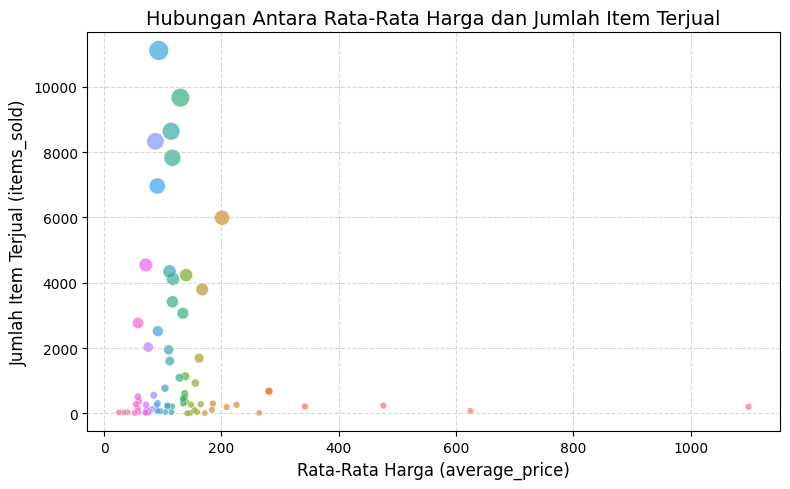

In [72]:
# Pastikan data sudah tersedia
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=category_price,
    x='average_price',
    y='items_sold',
    hue='product_category_name_english',  # Beda warna per kategori
    size='items_sold',                   # Ukuran titik sesuai penjualan
    sizes=(20, 200),
    alpha=0.7,
    legend=False
)

# Customisasi
plt.title('Hubungan Antara Rata-Rata Harga dan Jumlah Item Terjual', fontsize=14)
plt.xlabel('Rata-Rata Harga (average_price)', fontsize=12)
plt.ylabel('Jumlah Item Terjual (items_sold)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Tampilkan plot
plt.show()

<ipython-input-73-39d0f0f84cea>:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(category_price_sorted['product_category_name_english'], rotation=90)


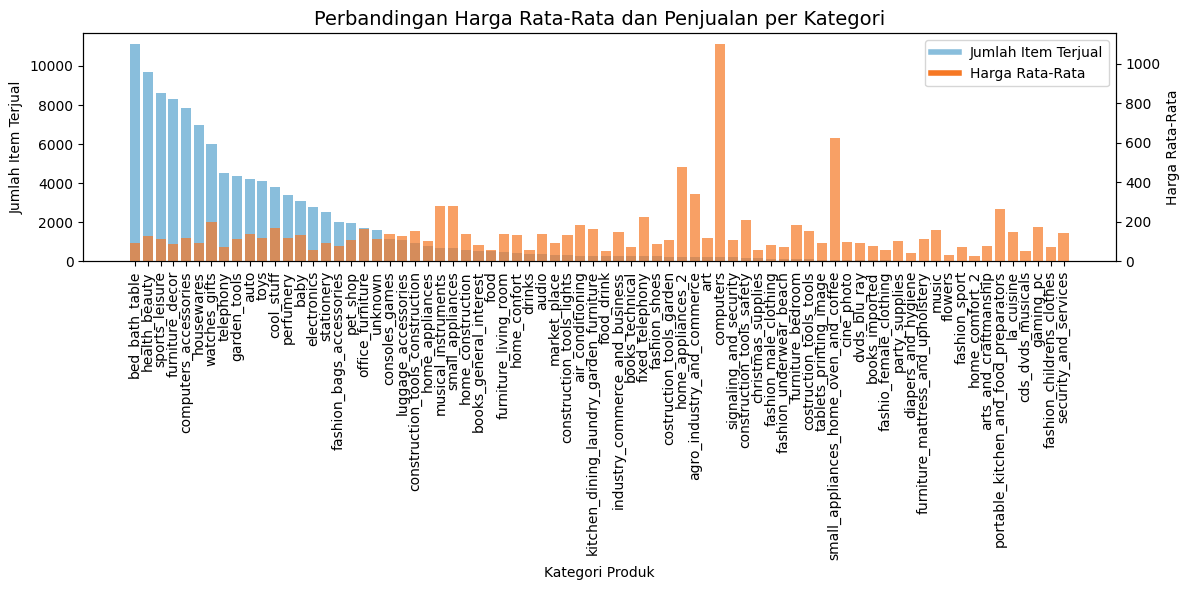

In [73]:
fig, ax1 = plt.subplots(figsize=(12,6))

# Urutkan kategori agar lebih mudah dibaca
category_price_sorted = category_price.sort_values(by='items_sold', ascending=False)

# Sumbu pertama - items_sold (bar biru)
ax1.bar(category_price_sorted['product_category_name_english'],
        category_price_sorted['items_sold'],
        color=sns.color_palette("Blues")[2],
        label='Items Sold')

# Buat sumbu kedua - average_price (bar oranye)
ax2 = ax1.twinx()
ax2.bar(category_price_sorted['product_category_name_english'],
        category_price_sorted['average_price'],
        color=sns.color_palette("Oranges")[3],
        label='Average Price', alpha=0.7)

# Kostumisasi
ax1.set_xticklabels(category_price_sorted['product_category_name_english'], rotation=90)
ax1.set_title('Perbandingan Harga Rata-Rata dan Penjualan per Kategori', fontsize=14)
ax1.set_ylabel('Jumlah Item Terjual')
ax2.set_ylabel('Harga Rata-Rata')
ax1.set_xlabel('Kategori Produk')
plt.tight_layout()
plt.grid(False)

# Keterangan
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color=sns.color_palette("Blues")[2], lw=4),
                Line2D([0], [0], color=sns.color_palette("Oranges")[3], lw=4)]
ax1.legend(custom_lines, ['Jumlah Item Terjual', 'Harga Rata-Rata'], loc='upper right')

# Tampilkan chart
plt.show()

##### <u>Insights</u>:

### **Analisis Efisiensi Harga dan Penjualan Kategori Produk**

#### Tujuan Analisis

Analisis ini bertujuan untuk memahami hubungan antara:
- **Harga rata-rata produk (average_price)**
- **Jumlah item terjual (items_sold)**  

dalam dataset e-commerce yang mencakup **74 kategori produk**. Dengan menggunakan pendekatan visualisasi dan metrik statistik, kita dapat mengidentifikasi:

- Pola umum antara harga dan volume penjualan.
- Anomali dalam pola tersebut.
- Potensi inefisiensi harga serta rekomendasi strategi pricing dan promosi.

---

### 1. Distribusi Harga Rata-Rata Kategori

| Parameter | Nilai |
|----------|-------|
| Minimum  | `$`25 |
| Maksimum | `$`1098 |
| Rata-rata | `$`146 |
| Q3 (Quantil ke-75) | `$`152 |

> **Insight**:  
Hanya ada sedikit kategori dengan harga premium (> `$`1000), namun mereka memiliki kontribusi rendah terhadap volume penjualan, menunjukkan bahwa pasar lebih sensitif terhadap harga daripada fitur eksklusivitas.

---

### 2. Hubungan Antara Harga dan Volume Penjualan

Dari scatter plot yang telah dibuat, ditemukan **korelasi negatif lemah hingga moderat** antara harga rata-rata dan jumlah item terjual.

#### Pola Umum
- **Kategori dengan harga rendah** (`$`<100) cenderung memiliki **volume penjualan tinggi**.
- **Rentang optimal** berada di sekitar `$`100–`$`200, di mana penjualan relatif stabil dan margin profit masih bisa diterima.

#### Anomali Penting
- Beberapa kategori memiliki **harga rendah**, tetapi **penjualan juga rendah**, misalnya beberapa kategori seperti `flowers`, `fashion female clothing`, dan `fashion sport`.
- Faktor penyebab potensial:
  - Kurangnya variasi atau pilihan produk.
  - Persepsi nilai buruk dari pelanggan.
  - Minimnya visibilitas di halaman pencarian/platform.

---

### 3. Performa Kategori Spesifik

#### (a) Kategori Computers
- **Harga Rata-Rata**: Tertinggi (`$`1098)
- **Penjualan**: Relatif rendah
- **Analisis**: Meskipun elektronik secara alami memiliki harga tinggi, performa kategori ini tidak sejalan dengan ekspektasi. Ini bisa menjadi indikator adanya persaingan kuat atau kurangnya trust pelanggan pada produk kategori ini.

#### (b) Kategori Small Appliances
- **Harga Rata-Rata**: Lebih tinggi dari kategori rumah tangga lainnya (`$`200+)
- **Penjualan**: Cenderung rendah
- **Analisis**: Kategori ini mungkin menghadapi masalah relevansi pasar atau dominasi merek-merek mapan.

>  
Kedua kategori ini memerlukan pendekatan marketing dan positioning ulang agar bisa bersaing lebih efektif.

---

### 4. Rekomendasi Utama untuk Bisnis

#### (a) Dorong Ekspansi Kategori dengan Harga Rendah & Volume Tinggi
Fokus pada kategori yang sudah populer:
- **bed_bath_table**
- **furniture_decor**
- **sports_leisure**

**Strategi**:
- Cross-selling dan bundling produk terkait.
- Promosi musiman untuk meningkatkan frekuensi pembelian.
- Personalisasi rekomendasi produk di homepage/landing page.

---

#### (b) Evaluasi Ulang Kategori dengan Harga Tinggi & Penjualan Rendah
Untuk kategori seperti:
- **computers**
- **small_appliances**

**Rekomendasi**:
- Jalankan kampanye diskon besar-besaran atau flash sale.
- Tingkatkan awareness melalui iklan berbayar atau kolaborasi dengan influencer teknologi.
- Pastikan deskripsi produk, spesifikasi, dan garansi ditampilkan jelas untuk meningkatkan trust pelanggan.

---

#### (c) Optimalkan Kategori dengan Harga Rendah tapi Penjualan Rendah
Beberapa kategori memiliki anomali ini, seperti:
- `flowers`
- `fashion female clothing`
- `fashion sport`

**Langkah-langkah yang disarankan**:
- Lakukan riset pasar untuk memahami minat dan persepsi pelanggan.
- Tingkatkan visibilitas melalui optimasi SEO dan rekomendasi algoritma.
- Gunakan testimonial dan review positif untuk membangun keyakinan belanja.

---

#### (d) Segmentasi Kategori Berdasarkan Rentang Harga

| Segmen Harga     | Karakteristik Pasar | Target Strategi |
|------------------|---------------------|----------------|
| `< $100`         | Sensitif harga, volume tinggi | Fokus pada penetrasi pasar dan skala |
| `$100 - $200`    | Stabil, margin ideal | Optimalkan konversi dan AOV |
| `> $200`         | Premium, volume rendah | Bangun brand image dan loyalitas |

> **Catatan**:  
Pendekatan pricing harus didasarkan pada segmentasi pasar dan tujuan bisnis — apakah ingin fokus pada **volume**, **margin**, atau **brand positioning**.

---

### 5. Kesimpulan Akhir

Analisis ini mengidentifikasi bahwa:

- **Mayoritas kategori dengan harga rendah memiliki penjualan tinggi**, mengindikasikan bahwa harga kompetitif masih menjadi daya tarik utama bagi pelanggan.
- **Kategori dengan harga tinggi memiliki penjualan rendah**, sehingga perlu evaluasi ulang atas strategi pricing dan positioning.
- **Ada anomali kategori dengan harga rendah namun penjualan rendah**, yang memerlukan investigasi lebih lanjut terhadap persepsi, visibilitas, atau kualitas produk.

Dengan implementasi rekomendasi strategis ini, bisnis diharapkan dapat:
- Meningkatkan revenue melalui optimasi pricing dan promosi.
- Memperluas pasar dengan kampanye lokal dan personalisasi.
- Mengidentifikasi dan mengembangkan kategori underperform.

---

## Analisis Preferensi Pembayaran

In [82]:
payment_analysis = orders_comprehensive_df_cleaned.merge(order_payments_df, on='order_id', how='left')

payment_analysis = payment_analysis.drop(columns=['payment_sequential', 'payment_installments'])
payment_analysis = payment_analysis.dropna()
payment_analysis = payment_analysis.drop_duplicates()

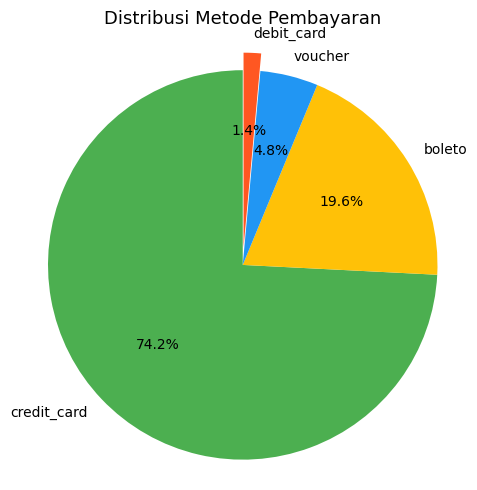

In [88]:
# distribusi metode pembayaran yang ada

# Menghitung frekuensi metode pembayaran
payment_counts = payment_analysis['payment_type'].value_counts()

# Persiapkan data untuk pie chart
labels = payment_counts.index  # Kategori segmentasi (e.g., champion, loyal, etc.)
sizes = payment_counts.values  # Jumlah pelanggan di setiap kategori
colors = ['#4CAF50', '#FFC107', '#2196F3', '#FF5722', '#9E9E9E']  # Warna untuk setiap segmen
explode = [0.09 if label == 'debit_card' else 0 for label in labels]  # Sorot segmen 'champion'

# Buat pie chart
plt.figure(figsize=(5, 5))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',  # Tampilkan persentase
    startangle=90,      # Sudut awal pie chart
    colors=colors,
    explode=explode,     # Sorot segmen 'champion'
    textprops={'fontsize': 10}  # Ukuran font label
)

# Judul dan tata letak
plt.title('Distribusi Metode Pembayaran', fontsize=13)
plt.axis('equal')  # Pastikan pie chart berbentuk lingkaran sempurna
plt.tight_layout()

# Tampilkan pie chart
plt.show()

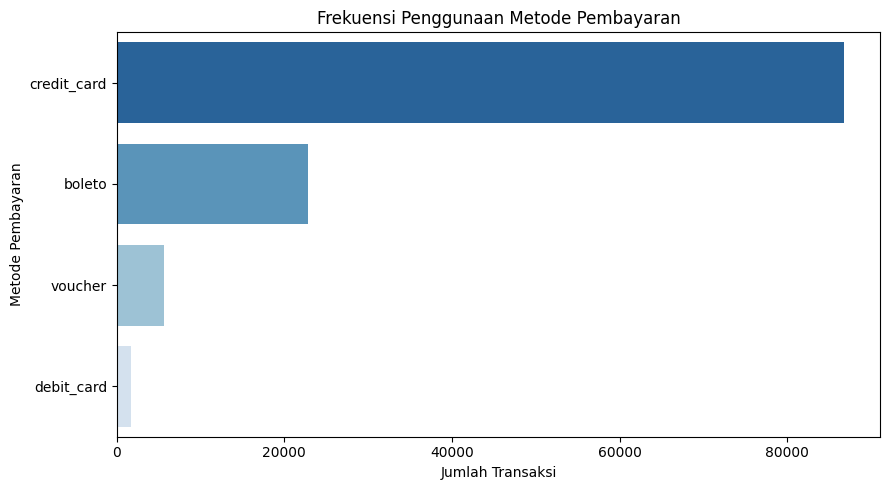

In [84]:
# Menghitung frekuensi metode pembayaran
payment_counts = payment_analysis['payment_type'].value_counts().reset_index()
payment_counts.columns = ['payment_type', 'frequency']

# Membuat bar chart horizontal
plt.figure(figsize=(9,5 ))
sns.barplot(data=payment_counts, x='frequency', y='payment_type', hue='payment_type', legend=False, palette='Blues_r')
plt.title('Frekuensi Penggunaan Metode Pembayaran')
plt.xlabel('Jumlah Transaksi')
plt.ylabel('Metode Pembayaran')
plt.tight_layout()
plt.show()

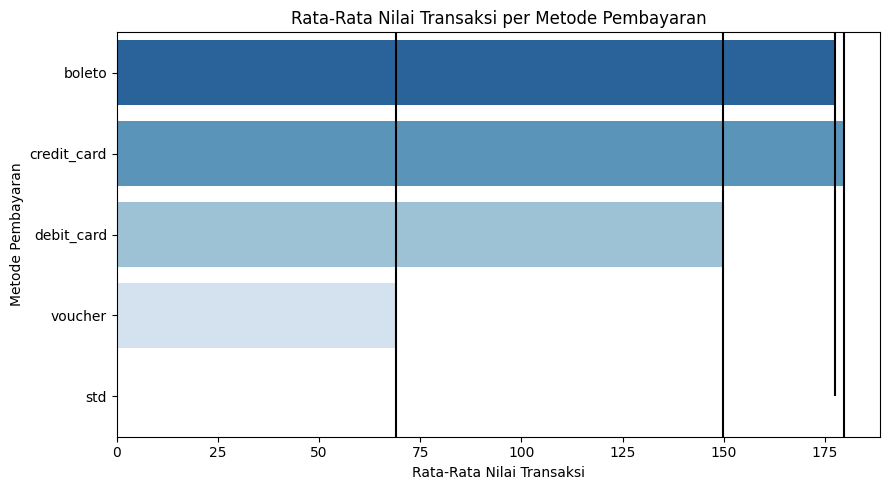

In [85]:
# Menghitung rata-rata dan standar deviasi nilai transaksi per metode pembayaran
payment_stats = payment_analysis.groupby('payment_type')['payment_value'].agg(['mean', 'std']).reset_index()

# Membuat bar chart horizontal dengan error bars
plt.figure(figsize=(9, 5))
sns.barplot(data=payment_stats, x='mean', y='payment_type', yerr='std', hue='payment_type', legend=False, capsize=0.2, palette='Blues_r')
plt.title('Rata-Rata Nilai Transaksi per Metode Pembayaran')
plt.xlabel('Rata-Rata Nilai Transaksi')
plt.ylabel('Metode Pembayaran')
plt.tight_layout()
plt.show()

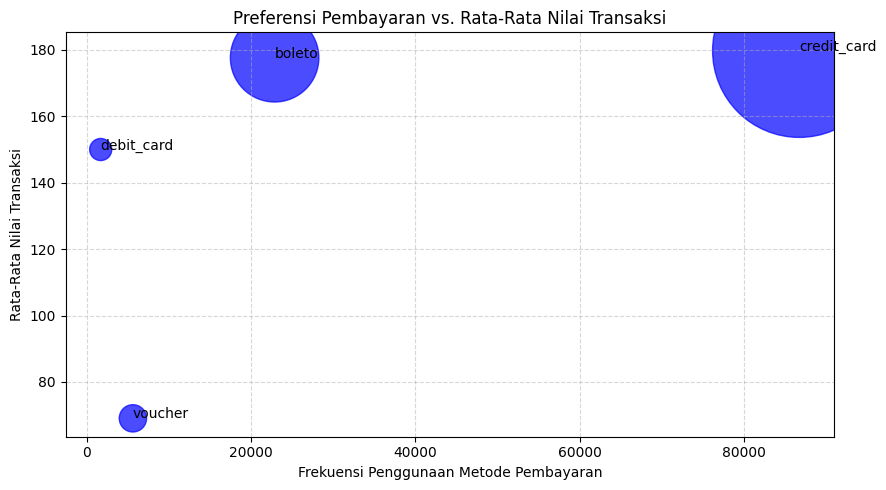

In [86]:
# Menghitung frekuensi, rata-rata nilai transaksi, dan total nilai transaksi
payment_summary = payment_analysis.groupby('payment_type').agg({
    'payment_value': ['count', 'mean', 'sum']
}).reset_index()
payment_summary.columns = ['payment_type', 'frequency', 'average_payment_value', 'total_payment_value']

# Membuat bubble chart
plt.figure(figsize=(9, 5))
plt.scatter(
    payment_summary['frequency'],
    payment_summary['average_payment_value'],
    s=payment_summary['total_payment_value'] / 1000,  # Ukuran bubble
    alpha=0.7,
    c='blue'
)
for i, txt in enumerate(payment_summary['payment_type']):
    plt.annotate(txt, (payment_summary['frequency'][i], payment_summary['average_payment_value'][i]))

plt.title('Preferensi Pembayaran vs. Rata-Rata Nilai Transaksi')
plt.xlabel('Frekuensi Penggunaan Metode Pembayaran')
plt.ylabel('Rata-Rata Nilai Transaksi')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

##### <u>Insights</u>:

### **Analisis Preferensi Metode Pembayaran Pelanggan E-Commerce**  

#### Tujuan Analisis

Analisis ini bertujuan untuk memahami **preferensi pembayaran pelanggan** di platform e-commerce berdasarkan dataset `payment_analysis`. Dengan menggunakan pendekatan kuantitatif dan visualisasi, kita akan mengidentifikasi:

- **Metode pembayaran yang paling populer**
- **Hubungan antara metode pembayaran dan nilai transaksi (AOV)**
- **Pola perilaku belanja pelanggan berdasarkan metode pembayaran**
- **Rekomendasi strategis untuk meningkatkan konversi dan loyalitas pelanggan**

---

### 1. Distribusi Frekuensi Penggunaan Metode Pembayaran

| Metode Pembayaran     | Persentase Penggunaan |
|-----------------------|----------------------|
| `credit_card`         | 74.2%                |
| `boleto_bancario`     | 19.6%                |
| `voucher`             | 4.8%                 |
| `debit_card`          | 1.4%                 |

>  
- **`credit_card`** adalah metode pembayaran **paling dominan**, menunjukkan tingginya kepercayaan pengguna terhadap sistem digital.
- **`boleto_bancario`** tetap relevan di market e-commerce dengan pangsa pasar lebih dari **19%**.
- **`voucher`** dan **`debit_card`** hanya digunakan oleh segmen kecil pelanggan → mungkin kurang efektif atau kurang dipromosikan secara optimal.

---

### 2. Rata-Rata Nilai Transaksi per Metode Pembayaran (AOV)

| Metode Pembayaran     | Jumlah Transaksi       | Rata-Rata Nilai Transaksi |
|-----------------------|------------------------|----------------------------|
| `credit_card`         | > 85.000               | **`$`175** *(tertinggi)*     |
| `boleto_bancario`     | ~21.000                | **`$`170** *(hampir setara credit card)* |
| `debit_card`          | ~1.400                 | **`$`150** *(sedang)*        |
| `voucher`             | ~4.800                 | **`$`60** *(terendah)*       |

>  
- **`credit_card`** tidak hanya **paling banyak digunakan**, tetapi juga **menghasilkan nilai transaksi tertinggi** → cocok untuk kampanye produk premium.
- **`boleto`** meskipun frekuensinya lebih rendah, tetap memiliki **AOV tinggi** → menunjukkan bahwa konsumen dalam segmen ini memiliki **daya beli kuat** namun preferensi pembayaran yang berbeda.
- **`debit_card`** digunakan untuk transaksi bernilai menengah → bisa jadi karena batasan dana atau preferensi pelanggan yang lebih hati-hati.
- **`voucher`** memiliki **AOV paling rendah ($60)** → ideal untuk **produk entry-level**, promosi flash sale, atau kampanye customer acquisition.

---

### 3. Pola Umum Berdasarkan Visualisasi

Dari scatter plot dan analisis lainnya:
- Terdapat **korelasi positif lemah hingga moderat** antara **frekuensi penggunaan** dan **nilai transaksi rata-rata**.
- Kategori metode pembayaran yang sering digunakan (`credit_card`, `boleto`) juga memiliki **AOV yang tinggi**.
- Sebaliknya, metode langka (`voucher`, `debit_card`) memiliki **AOV lebih rendah**, sejalan dengan karakteristik penggunanya.

#### Insight
- **`credit_card` dan `boleto`** digunakan oleh pelanggan dengan daya beli tinggi → ideal untuk retargeting produk premium atau cross-selling item high-margin.
- **`voucher`** banyak digunakan untuk pembelian kecil → cocok untuk **kampanye flash sale** atau memberikan **insentif tambahan** agar pelanggan meningkatkan nilai belanja mereka.
- **`debit_card`** memiliki potensi besar dalam segmentasi pelanggan yang lebih selektif → layak mendapat fokus dalam **program retention** dan **peningkatan trust**.

---

### 4. Rekomendasi Strategis untuk Bisnis

| Area | Insight | Rekomendasi Prioritas |
|------|--------|------------------------|
| **Optimalkan Channel Utama: `credit_card`** | Metode ini mendominasi baik dari segi frekuensi maupun AOV | - Pastikan sistem pembayaran lancar dan aman.<br>- Dorong cross-selling dan retargeting produk premium jika pelanggan menggunakan `credit_card`. |
| **Evaluasi Potensi `voucher` sebagai Alat Promosi** | Digunakan untuk pembelian kecil dengan AOV rendah | - Tawarkan insentif tambahan jika nilai minimum keranjang belanja tercapai.<br>- Fokus pada produk murah atau bundling untuk meningkatkan konversi. |
| **Maksimalkan Potensi `debit_card`** | Memiliki frekuensi dan AOV menengah | - Lakukan segmentasi pelanggan yang menggunakan debit card.<br>- Bangun trust melalui garansi keamanan pembayaran, promo spesial, atau integrasi teknologi pembayaran digital. |

---

### 5. Kesimpulan Akhir

Analisis ini mengidentifikasi bahwa:

- **`credit_card`** adalah metode pembayaran **dominan** dalam hal frekuensi dan nilai transaksi.
- **`boleto`** meskipun frekuensinya lebih rendah, tetap menghasilkan **transaksi bernilai tinggi**, menunjukkan bahwa konsumen dalam segmen ini memiliki **daya beli kuat**.
- **`voucher`** digunakan untuk transaksi kecil dan cocok menjadi alat dalam kampanye customer acquisition.
- **`debit_card`** masih belum dimanfaatkan secara optimal dan layak mendapat fokus dalam program retention serta peningkatan trust.

Dengan implementasi rekomendasi ini, bisnis diharapkan dapat:
- Meningkatkan **konversi pembayaran**
- Mengoptimalkan **customer journey** berdasarkan metode pembayaran
- Menyusun **strategi personalisasi** yang lebih efektif
- Membangun sistem pembayaran yang lebih inklusif dan user-friendly

---


# Kesimpulan Akhir Proyek Analisis E-Commerce

Proyek ini bertujuan untuk memberikan wawasan mendalam terhadap dataset e-commerce publik di Brasil dengan menggunakan pendekatan analitis dan visualisasi data yang konkret. Data yang digunakan mencakup transaksi dari tahun **2016 hingga 2018**, melibatkan lebih dari **99.000 pesanan**, **96.000 pelanggan unik**, dan **32.951 produk** dari **74 kategori utama**.

Dengan pendekatan analisis data mulai dari **EDA**, **segmentasi RFM**, **analisis tren musiman**, **evaluasi efisiensi harga**, hingga **analisis preferensi pembayaran dan ulasan pelanggan**, berikut adalah kesimpulan dan rekomendasi penting:

---

## Temuan Utama

### 1. **Segmentasi Pelanggan (RFM Analysis)**

- Mayoritas pelanggan (**~89%**) termasuk dalam kategori **At Risk** dan **Potential Loyalist**.
- Hanya sekitar **5% pelanggan yang dikategorikan loyal**, menunjukkan perlunya strategi retensi yang lebih kuat.

> Insight: Platform memiliki potensi besar untuk meningkatkan retensi pelanggan dengan personalisasi dan program loyalitas.

---

### 2. **Pola Penjualan Produk**

- Kategori seperti **bed_bath_table**, **health_beauty**, dan **sports_leisure** menjadi kontributor terbesar terhadap penjualan dan revenue.
- Harga rata-rata rendah umumnya berkorelasi dengan volume penjualan tinggi.
- Beberapa kategori mengalami anomali harga — yaitu harga rendah namun penjualan rendah.

> Insight: Optimalkan pricing strategy dan visibilitas produk pada kategori underperform.

---

### 3. **Preferensi Metode Pembayaran**

- **Kartu kredit** adalah metode pembayaran paling populer (>70%).
- `boleto bancario` tetap relevan di pasar lokal (~20%), sementara voucher dan debit card memiliki proporsi lebih kecil.
- Tidak ada hubungan langsung antara metode pembayaran dan jumlah transaksi, namun kartu kredit cenderung terkait dengan AOV (rata-rata nilai transaksi) yang lebih tinggi.

> Insight: pastikan metode pembayaran yang paling populer tidak pernah bermasalah dan optimal, dan manfaatkan metode tertentu untuk tujuan strategis yang spesifik.

---

### 4. **Tren Musiman & Geografis**

- Lonjakan penjualan terjadi di bulan **November setiap tahun**, kemungkinan besar dipicu oleh kampanye Black Friday.
- Negara bagian **SP (São Paulo)** adalah pusat aktivitas dengan **hampir 40.000 transaksi** dan revenue lebih dari **$5 juta**.
- Wilayah seperti **GO, ES, DF** memiliki potensi pertumbuhan meskipun jumlah pelanggan masih rendah.

> Insight: Ekspansi regional dan optimasi logistik sangat diperlukan untuk memaksimalkan potensi pasar.

---

### 5. **Masalah Operasional & Ulasan Pelanggan**

- Dari total ulasan:
  - **Bintang 5**: 56%
  - **Bintang 4**: 18.9%
  - **Netral (bintang 3)**: 8.4%
  - **Negatif (bintang 2–1)**: 16.6%

- Masalah operasional yang sering muncul:
  - Barang tidak diterima meskipun status shipped
  - Pengiriman hilang/telat
  - Produk rusak/cacat
  - Seller mengirimkan barang yang salah

>  Hal Yang Harus Diperhatikan: Ketidaksesuaian sistem dan realita pengiriman berdampak langsung pada kepuasan pelanggan dan reputasi platform.

---

## Rekomendasi Strategis

| Area Bisnis       | Insight Utama                      | Rekomendasi Prioritas         |
|-------------------|------------------------------------|-------------------------------|
| Retensi Pelanggan | 89% pelanggan At Risk / Potential Loyal | Bangun program loyalitas berbasis reward dan personalisasi |
| Promosi Musiman   | Lonjakan di November               | Event Black Friday yang lebih masif dan terstruktur |
| Pembayaran        | Kartu kredit dominan               | - Pastikan sistem pembayaran lancar dan aman<br> - Bangun trust melalui garansi keamanan pembayaran, promo spesial, atau integrasi teknologi pembayaran digital |
| Logistik          | Status pesanan vs realita tidak sinkron | Implementasi auto-tracking dan kerja sama ekspedisi terpercaya |
| Lokasi            | SP dominan                         | Fokus penetrasi di wilayah dengan populasi pelanggan rendah, atau wilayah yang belum terjangkau seperti wilayah tengah Brazil |
| Produk & Harga    | Beberapa kategori kurang optimal   | Lakukan pricing audit & promosikan kategori underperform |

---

## Nilai Proyek Bagi Bisnis

Proyek ini ditujukan untuk memberikan gambaran holistik atas operasional, perilaku pelanggan, dan tren pasar dari platform e-commerce. Hasilnya bisa digunakan untuk:
- Meningkatkan **pengalaman belanja pelanggan**
- Mengurangi **churn rate** dan meningkatkan **retensi**
- Memperbaiki **efisiensi logistik dan update status pesanan**
- Menyusun **strategi promosi musiman** yang lebih efektif
- Optimasi **pricing strategy** dan **segmentasi pasar**

---

## Penutup

Dengan menerapkan rekomendasi hasil proyek ini, bisnis e-commerce akan memiliki potensi besar untuk meningkatkan kepuasan pelanggan, membangun loyalitas jangka panjang, serta memperluas basis pelanggan aktif.  

Data bukan hanya cermin masa lalu — tapi juga panduan untuk masa depan yang lebih efisien dan profitabel.

> *Laporan ini merupakan contoh bagaimana analisis data dapat dikemas menjadi wawasan strategis yang actionable dan bernilai bisnis.*  
> *Oleh: <u>Aldiansyah</u>, Sebagai Portofolio Proyek Data Analyst*